<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_09_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Simple linear regression (OLS - Ordinary Least Squares)



As a conversation starter here is Twitter science fact:

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/historical_fact_tweet.png)

It turns out OLS has been around for a while :)

<br>

Let's get started.

Consider you have training data $\{(x_1,y_1),\dots,(x_N,y_N)\}$ and you want find a line

$$
y(x)=a+b\cdot x
$$

that fits your data the best. To determine the best parameters $a$ and $b$ we use a measure of discrepancy between  the observed outputs and the linear regression fit such as the **S**um of **S**quared training **E**rrors (SSE). This is also called **O**rdinary **L**east **S**quares (OLS) and minimizes

$$
\text{SSE}(a,b)=\text{SS}_{res[iduals]}=\sum_{i=1}^N{\text{residual}_i}^2=\sum_{i=1}^N(y_i-y(x_i))^2=\sum_{i=1}^N(y_i-a-b\cdot x_i)^2.
$$











In [ ]:
#@title Residuals...
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/ols_residuals.svg'>
</img>

Our task is to find the parameters $\hat{a}$ and $\hat{b}$ that minimize $\text{SSE}(a, b)$.
This function is sometimes called **error function** or **fit function** or **loss function**.

We are seeking for

$$
(\hat{a},\hat{b})=\text{argmin}_{a,b} \, \text{SSE}(a,b).
$$

As I said we can calculate minimum analytically.
Differentiating with respect to $a$ and $b$ we obtain

$$
\begin{aligned}
\frac{\partial}{\partial a}\text{SSE}(a,b)&=-2\sum_{i=1}^N(y_i-a-bx_i), \\
\frac{\partial}{\partial b}\text{SSE}(a,b)&=-2\sum_{i=1}^N(y_i-a-bx_i)x_i. \\
\end{aligned}
$$

All in all we get

$$
\begin{aligned}
\hat{a}&=\frac{\sum_i y_i}{N}-\hat{b}\frac{\sum_i x_i}{N},\\
\hat{b}&=\frac{\frac{\sum_i x_i y_i}{N}-\frac{\sum_i x_i\sum_i y_i}{N^2}}{\frac{\sum_i x_i^2}{N}-\left(\frac{\sum_i x_i^2}{N}\right)^2}.
\end{aligned}
$$


In [ ]:
#@title Distance...
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/ols_distances.svg'>
</img>

You could prefer choosing

$$
E_p(a,b)=\sum_{i=1}^N |y_i-y(x_i)|^p , \qquad 1\leq p < \infty
$$

instead of 'classic' $\text{SSE}(a,b)$.

In fact we can choose distances in a completely different ways


These $E$s would render different results. We've chosen quadratic function $p=2$ (hence least-squares method name) because we can find its minimum analytically.

Later we will find it useful to add extra term to $\text{SSE}(a,b)$ (regularization).

In [ ]:
#@title Sum of squared errors (SSE)

%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/demo_sse.html?rnd=1"
        width="1200" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

As I said we can calculate minimum analytically.
Differentiating with respect to $a$ and $b$ we obtain

$$
\begin{aligned}
\frac{\partial}{\partial a}\text{SSE}(a,b)&=-2\sum_{i=1}^N(y_i-a-bx_i), \\
\frac{\partial}{\partial b}\text{SSE}(a,b)&=-2\sum_{i=1}^N(y_i-a-bx_i)x_i. \\
\end{aligned}
$$

Dividing by $N$ and equating equations to zero, we can deduce the optimal parameters as a solution of two linear equations

$$
\begin{aligned}
&\langle{y}\rangle-\hat{a}-\hat{b}\langle{x}\rangle=0, \\
&\langle{xy}\rangle-\hat{a}\langle{x}\rangle-\hat{b}\langle{x^2}\rangle=0.
\end{aligned}
$$

By solving this we obtain

$$
\begin{aligned}
\hat{a}&=\langle{y}\rangle-\hat{b}\langle{x}\rangle, \\
\hat{b}&=\frac{\langle{xy}\rangle-\langle{x}\rangle\langle{y}\rangle}{\langle{x^2}\rangle-\langle{x}\rangle^2}.
\end{aligned}
$$

Expression for $b$ could be rewritten as

$$
\hat{b}=\frac{\sigma(x,y)}{\sigma_x^2}.
$$

Where $\sigma_x$ is uncorrected(biased) sample standard deviation and $\sigma(x,y)$ is covariation.


It's easy to show that regression line always passes through the center of mass of the point cloud - the point $(\langle x \rangle, \langle y \rangle)$ (aka point of averages, aka centroid).

Let me remind you that
$$
\rho(x,y)=\frac{\sigma(x,y)}{\sigma_x \sigma_y}.
$$

so

$$
\hat{b}=\rho(x,y)\frac{\sigma_y}{\sigma_x},
$$

where $\rho(x,y)$ is correlation coefficient (a.k.a. **Pearson correlation coefficient**).




In [ ]:
#@title Regression and SD lines
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/regression_and_sd_lines.svg'>
</img>

Actually we can write equation of the line as

$$
y=\langle {y} \rangle+\rho(x,y)\frac{\sigma_y}{\sigma_x}(x-\langle {x} \rangle)
$$

or in standard form

$$
\frac{y-\langle {y} \rangle}{\sigma_y}=\rho(x,y)\frac{x-\langle {x} \rangle}{\sigma_x}.
$$

This equation shows why regression is actually called this way. In units of std $y$ deviates from its average $\rho(x,y)$ less then $x$. It's called regression towards mean. The concept of regression comes from genetics and was popularized by Sir Francis Galton during the late XIX century with the publication of [Regression towards mediocrity in hereditary stature](http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf). Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mean.

In fact equations above show the power of descriptive statistics:
equation

$$
y-\langle {y} \rangle = \rho(x,y)\frac{\sigma_y}{\sigma_x}(x-\langle {x} \rangle)\qquad \dashleftarrow \quad \color{green}{\text{nice}}
$$

looks much more clean and meaningful than

$$
y=\hat{a}+\hat{b}\, x,
$$

with

$$
\begin{aligned}
\hat{a}&=\frac{\sum_i y_i}{N}-\hat{b}\frac{\sum_i x_i}{N}, \qquad &\dashleftarrow \quad \color{red}{\text{messy}}\\
\hat{b}&=\frac{\frac{\sum_i x_i y_i}{N}-\frac{\sum_i x_i\sum_i y_i}{N^2}}{\frac{\sum_i x_i^2}{N}-\left(\frac{\sum_i x_i^2}{N}\right)^2}. \qquad &\dashleftarrow \quad \color{red}{\text{messy}}
\end{aligned}
$$

We can not only calculate fitting line but also get the goodness of fit with the help of the **coefficient of determination**.
The coefficient of determination ("$R$ squared") is equal to $\rho^2$.
This is a statistical measure of how well the regression prediction approximates real data points. An $R^2$ of $1$ indicates that the regression predictions perfectly fit the data.

In [ ]:
#@title #Linear regression for a point cloud with adjustable parameters

%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/demo_point_cloud.html"
        width="600" height="650"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

##Coefficient of determination

In [ ]:
#@title R squared
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/r_squared.svg'>
</img>



**$R^2$ shows what fraction of initial data variance is explained by the fitted model.**

$$
R^2=\frac{\text{Var}_{data}-\text{Var}_{res}}{\text{Var}_{data}},
$$

where

$$
\begin{aligned}
\text{Var}_{data}&=\text{Var}\{y_i\mid i=1\dots N\}, \\
\text{Var}_{res[iduals]}&=\text{Var}\{\text{model}(x_i)- y_i \mid i=1\dots N\}.
\end{aligned}
$$

Quantity $FVU=1-R^2=\frac{\text{Var}_{res}}{\text{Var}_{data}}$ is called **F**raction of **V**ariance **U**nexplained.

### Derivation

Since we have expressions for $\hat{a}$ and $\hat{b}$ let's explore square of the loss function.

$$
\text{SS}_{res[iduals]}=\sum(y_i-\hat{a}-\hat{b}x_i)^2=\{\hat{a}=\langle y \rangle - \hat{b} \langle x \rangle \} =\\
=\sum(y_i-\langle y \rangle -\hat{b} \langle x \rangle-\hat{b}x_i)^2=\sum \left((y_i-\langle y \rangle) -\hat{b} (x_i-\langle x \rangle)\right)^2 = \\
=\sum (y_i-\langle y \rangle)^2-2 \hat{b} \sum (y_i-\langle y \rangle)(x_i-\langle x \rangle)+{\hat{b}}^2\sum (x_i-\langle x \rangle)^2
$$

We now use definitions

$$
\begin{aligned}
\sigma^2_y&=\frac{\sum (y_i-\langle y \rangle)^2}{N}, \\
\sigma^2_x&=\frac{\sum (x_i-\langle x \rangle)^2}{N}, \\
\sigma_{xy}&=\frac{\sum (x_i-\langle x \rangle)(y_i-\langle y \rangle)}{N}.
\end{aligned}
$$

We get

$$
\text{SS}_{res}= N \sigma^2_y-2\hat{b} N\sigma_{xy}+{\hat{b}}^2 N\sigma_x^2.
$$

Now we use that

$$
\hat{b}=\frac{\sigma_{xy}}{\sigma_x^2}
$$

and obtain

$$
\text{SS}_{res}= N \sigma^2_y-2N\frac{\sigma^2_{xy}}{\sigma_x^2}+ N\frac{\sigma^2_{xy}}{\sigma_x^2}=N \sigma^2_y-N\frac{\sigma^2_{xy}}{\sigma_x^2}.
$$

See that
$$
\text{SS}_{data}=N\sigma_y^2=\sum(y_i-\langle y \rangle)^2
$$
and
$$
\text{SS}_{reg[ression]}=\sum(\langle y\rangle-\hat{a}-\hat{b}x_i)^2=\{\hat{a}=\langle y \rangle - \hat{b} \langle x \rangle \} =\\
=\hat{b}^2\sum(\langle x \rangle- x_i)^2= N \hat{b}^2 \sigma_x^2 = N\frac{\sigma_{xy}^2}{\sigma_{x}^2}
$$
thus
$$
\text{SS}_{res} = \text{SS}_{data} - \text{SS}_{reg}.
$$

Dividing both sides by $N$, it [turns out ](https://en.wikipedia.org/wiki/Explained_sum_of_squares#Simple_derivation) that

$$
\text{Var}_{data} = \text{Var}_{res[iduals]}+\text{Var}_{reg[ression]}.
$$

where

$$
\begin{aligned}
\text{Var}_{data} &= \frac{1}{N}\sum_i (y_i-\langle y \rangle)^2, \\
\text{Var}_{res} &= \frac{1}{N} \sum_i (y_i-\text{model}(x_i))^2, \\
\text{Var}_{reg} &= \frac{1}{N} \sum_i (\text{model}(x_i)-\langle y \rangle)^2.
\end{aligned}
$$

The latter can be used to define $R^2$ in a convenient way
$$
R^2=\frac{\text{SS}_{reg}}{\text{SS}_{data}}=\frac{\text{SS}_{data}-\text{SS}_{res}}{\text{SS}_{data}} = \frac{\text{Var}_{data}-\text{Var}_{res}}{\text{Var}_{data}}.
$$

Let me talk about $\text{Var}_{data}$ and $\text{Var}_{res}$ a little.


Let me color code these three variations. It turns out that total variation of data decomposes into sum of other two variations:

$$
\color{red}{\text{Var}_{data}} = \color{green}{\text{Var}_{res}}+\color{blue}{\text{Var}_{reg}}.
$$
or
или
$$
\color{red}{\sigma^2_{data}} = \color{green}{\sigma^2_{res}}+\color{blue}{\sigma^2_{reg}}.
$$

$R^2$ is one minus the fraction of residual variance to the total data variance

$$
R^2=1-\frac{\color{green}{\text{Var}_{res}}}{\color{red}{\text{Var}_{data}}}.
$$

or it's the fraction of variance explained (fraction of regression variance to the total variance)

$$
R^2=\frac{\color{blue}{\text{Var}_{reg}}}{\color{red}{\text{Var}_{data}}}.
$$



In [ ]:
#@title Colored variances
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/colored_variances.svg'>
</img>

### Adjusted coefficient of determination

The problem with $R^2$ is that it increases every time you add a new variable even if it's not relevant. The more variables, the greater $R^2$. To make $R^2$ more telling people came up with adjusted $R^2$:

$$
\bar{R}^2=1-(1-R^2)\left[\frac{N-1}{N-(n+1)}\right],
$$

where
* $N$ is the sample size
* $n$ is the number of independent variables in the regression equation.

You can rewrite it as

$$
\bar{R}^2=\frac{\frac{\text{Var}_{fit}}{df_{left}}}{\frac{\text{Var}_{data}}{df_{data}}},
$$

where
* $df_{data}=N-1$ degrees of freedom of data,
* $df_{left}=N-n-1$ degrees of freedom left in data after applying a model with $k$ degrees of freedom.

The key difference between $R^2$ and adjusted $R^2$ is that $R^2$ increases automatically as you add new independent variables to a regression equation (even if they don't contribute any new explanatory power to the equation). Therefore, you want to use adjusted $R^2$ with multiple regression analysis. Adjusted $R^2$ increases only when you add new independent variables that do increase the explanatory power of the regression equation, making it a much more useful measure of how well a multiple regression equation fits the sample data than $R^2$.

In short, **adjusted $R^2$ prevents you from overfitting**.

##Get-your-hands-dirty example

Let's do simple example by hand to get a feel of the method.
Suppose you have data $\{(1,1),(2,4),(4,5)\}$.
First we calculate averages and std's.

$$
\begin{aligned}
\langle{x}\rangle &=\langle{\{1,2,4\}}\rangle=\frac{1+2+4}{3}=2.33, \\
\langle{y}\rangle &=\langle{\{1,4,5\}}\rangle=\frac{1+4+5}{3}=3.33, \\
\sigma_x&=\sqrt{\frac{(1-2.33)^2+(2-2.33)^2+(4-2.33)^2}{3}}=1.25, \\
\sigma_y&=\sqrt{\frac{(1-3.33)^2+(4-3.33)^2+(5-3.33)^2}{3}}=1.70.
\end{aligned}
$$

Next we calculate covariation and correlation:

$$
\begin{aligned}
\sigma(x,y)&={\frac{(1-2.33)(1-3.33)+(2-2.33)(4-3.33)+(4-2.33)(5-3.33)}{3}}=1.89, \\
\rho(x,y)&=\frac{\sigma(x,y)}{\sigma_x \, \sigma_y}=\frac{1.89}{1.25\times 1.70}=0.89.
\end{aligned}
$$

Now we are ready to get parameters of the regression line
$$
\begin{aligned}
\hat{b}&=\rho(x,y)\frac{\sigma_y}{\sigma_x}=1.37\times\frac{1.70}{1.25}=1.21, \\
\hat{a}&=\langle{y}\rangle - \hat{b} \langle{x}\rangle=3.33-1.21\times 2.33=0.51.
\end{aligned}
$$


Thus the regression line is

$$
y=0.5+1.2 \, x.
$$

Goodness of fit is

$$
R^2=\rho^2(x,y)=0.89^2=0.8.
$$

that means that $80\%$ of variance is explained by the linear model.

Here is how you can do it in `Python`:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
xlist = [1,2,4]
ylist = [1,4,5]
x = np.array(xlist).reshape(-1,1)
y = np.array(ylist).reshape(-1,1)
model.fit(x,y)
print("Model slope b              = ", model.coef_[0][0])
print("Model intercept a          = ", model.intercept_[0])
print("Coef. of determination R^2 = ", (np.corrcoef(xlist, ylist)[0][1])**2)

Model slope b              =  1.2142857142857144
Model intercept a          =  0.49999999999999956
Coef. of determination R^2 =  0.7939560439560437


##Simple Linear Regression Example

Here are $50$ points that fit a line $2x-5$ with somewhat randomness added.

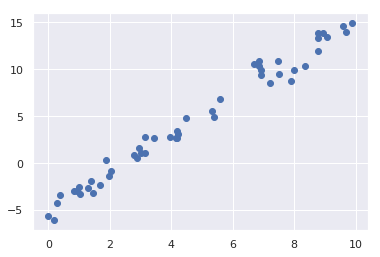

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

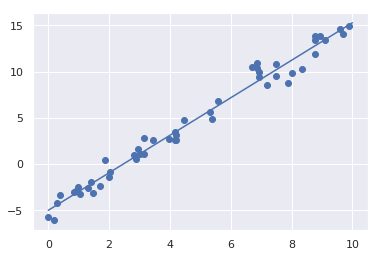

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope     = ", model.coef_[0])
print("Model intercept = ", model.intercept_)
print("R**2            = ", model.score(x.reshape(-1, 1),y))

Model slope     =  2.0272088103606953
Model intercept =  -4.998577085553204
R**2            =  0.9790800609430612


We successfully obtained parameters of the line. The $R^2=0.97$ tells us that the fit is pretty good.

## Interactive simple regression example

Feel free to play around with points on a plane.

In [ ]:
from sklearn.linear_model import LinearRegression

def fit_model(X, Y):
  model = LinearRegression(fit_intercept=True)
  model.fit(X, Y)
  return model

In [ ]:
#@title 1D Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(model, X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))

  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = model.predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0
  model = fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(model, X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 50, 50, 0.7)';
      ctx.fill();
    }

    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });



      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked">
    <label for="r1">
        Add data point
    </label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
        Move data point
    </label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
        Delete data point
    </label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s

display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

#Polylinear regression

Here is an example of polylinear regression.

Find the hyperplane

$$
y(x_1, \cdots, x_n)=a \cdot 1 + b_1x_1+b_2x_2+\cdots+b_nx_n \\
y(\mathbf{x})=a\cdot 1+\mathbf{b}^{\top} \mathbf{x}=(a, \mathbf{b})(1,\mathbf{{x}})^{\top}
$$

that fits sample $\{(\mathbf{x}^{(i)};y_{i})\}$.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print("Intersept = ", model.intercept_)
print("Slope b = ", model.coef_)

Intersept =  0.50000000000001
Slope b =  [ 1.5 -2.   1. ]


We have best fit line (hyperplane)

$$
y(x_1,x_2,x_3)=0.5+1.5\, x_1-2.0\, x_2+1.0\, x_3.
$$

##Methods to solve polylinear regression

###Matrix method

First we switch from variables $b_i \, (i=1\dots n)$ and $a$ to $w_i \, (i=0\dots n)$

$$
\begin{aligned}
w_{0}&=a \\
w_{i}&=b_i, \qquad \qquad \qquad \qquad \,\,\,\, i=1\dots n.
\end{aligned}
$$

Suppose you have data arranged in vectors

$$
\begin{aligned}
&\mathbf{x}^{(i)}=(1, x^{(i)}_{1},\cdots,x^{(i)}_{n})^{\top}, \qquad i=1\dots N. \\
&\mathbf{y}=(y_{1},\cdots,y_{N})^{\top}.
\end{aligned}
$$

We are seeking for the vector of $\hat{\mathbf{w}}$ so that

$$
\mathbf{y}_i \approx \hat{\mathbf{w}}^{\top}\mathbf{x}^{(i)}, \qquad \qquad \qquad \qquad i=1\dots N.
$$

We can express this equation in a single matrix equation. For that we place $\mathbf{x}^{(i)}$ in the rows of the matrix

$$
X=
\begin{pmatrix}
- & \mathbf{x}^{(1)\top} & - \\
\cdots & \cdots & \cdots\\
- & \mathbf{x}^{(N)\top} & -
\end{pmatrix}
=
\begin{pmatrix}
1 & x^{(1)}_{1} & \cdots & x^{(1)}_{n} \\
\cdots & \cdots & \cdots & \cdots\\
1 & x^{(N)}_{1} & \cdots & x^{(N)}_{n}
\end{pmatrix}.
$$

Now we can say that we are aiming to solve this

$$
X \mathbf{w} \approx \mathbf{y}.
$$

What does the $\approx$ sign mean? We want to minimize the norm squared of the residual function

$$
\mathbf{\epsilon}(\mathbf{w})=\mathbf{y}-X \mathbf{w}.
$$

In other words we our objective function reads

$$
E(\mathbf{w})={\|{\mathbf{\epsilon}}(\mathbf{w})\|}^2={\|\mathbf{y}-X \mathbf{w}\|}^2.
$$

We would like to find

$$
\hat{\mathbf{w}}=\text{argmin}_\mathbf{w} \, {\|\mathbf{y}-X \mathbf{w}\|}^2
=
\text{argmin}_\mathbf{w} \, (\mathbf{y}-X \mathbf{w})^{\top}(\mathbf{y}-X \mathbf{w})
=
\text{argmin}_\mathbf{w} \,(\mathbf{y}^{\top}\mathbf{y}-2\mathbf{w}^{\top}X^{\top}\mathbf{y}+\mathbf{w}^{\top}X^{\top}X\mathbf{w}).
$$

Please refer to [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) if you don't know how to take derivative of the linear and quadratic forms with respect to a vector

$$
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}}=-2 X^{\top}\mathbf{y}+2 X^{\top}X\mathbf{w}=\mathbf{0}.
$$

Equating derivative to $\mathbf{0}$ we get following equations (that are called Normal equations):

$$
X^{\top}X \, \hat{\mathbf{w}}=X^{\top}\mathbf{y},
$$

that have following solution (more on it's geometric meaning later)

$$
\hat{\mathbf{w}} = (X^{\top}X)^{-1}X^{\top}\mathbf{y}=X^{+}\mathbf{y},
$$

where $X^{+}$ is the Pseudoinverse matrix of $X$ defined as

$$
X^{+}=(X^{\top}X)^{-1}X^{\top}.
$$

In practice working with lots of data points inverting $X^{\top}X$ is not possible.


###Example


Let we have points
$$
\begin{aligned}
\mathbf{x}^{(1)}&=(1,1)^{\top}, \\
\mathbf{x}^{(2)}&=(1,2)^{\top}, \\
\mathbf{x}^{(3)}&=(1,4)^{\top} \\
\end{aligned}
$$

and $\mathbf{y}=(1,4,5)^{\top}$.

$$
X=
\begin{pmatrix}
- & \mathbf{x}^{(1)\top} & - \\
- & \mathbf{x}^{(2)\top} & - \\
- & \mathbf{x}^{(3)\top} & -
\end{pmatrix}
=
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 4
\end{pmatrix}.
$$

Now let's calculate pseudoinverse matrix

$$
X^{+}=\left(\begin{pmatrix}
1 & 1 & 1 \\
1 & 2 & 4
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 4
\end{pmatrix}
\right)^{-1}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 2 & 4
\end{pmatrix}=
\begin{pmatrix}
1 & 1/2 & -1/2 \\
-2/7 & -1/14 & 5/14
\end{pmatrix}.
$$

$$
\hat{\mathbf{w}}=X^{+}\mathbf{y}=
\begin{pmatrix}
1 & 1/2 & -1/2 \\
-2/7 & -1/14 & 5/14
\end{pmatrix}
\begin{pmatrix}
1 \\
4 \\
5
\end{pmatrix}=
\begin{pmatrix}
0.5 \\
1.21  
\end{pmatrix}.
$$

This solution matches the one we found [earlier](https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_09_linear_regression.ipynb#scrollTo=zwU3EXe3DZEz) using statistical functions $\sigma_x$, $\sigma_y$, $\langle x \rangle$, $\langle y \rangle$ and $\rho(x,y)$.

###Linear algebra perspective on the matrix method

I'd like to remind you a few things from linear algebra.
Suppose you have equation

$$
X\mathbf{w}=\mathbf{y}
$$

What does it mean?
It means: if $\mathbf{y}$ belongs to the column space of $X$ (aka $\text{Image}(X)$ or $\text{Im}$(X))

$$
\mathcal{C}(X)=\mathcal{C}
\left(\begin{pmatrix}
| & | \\
\mathbf{x}_1 & \mathbf{x}_2 \\
| & |
\end{pmatrix}\right)
$$

find it's decomposition into $\mathbf{x}_1$ and $\mathbf{x}_2$

$$
\mathbf{y}=w_1 \mathbf{x}_1 + w_2 \mathbf{x}_2
$$

Note, that if $\mathbf{y} \, {\not\in} \, \mathcal{C}(X)$ we can't solve for $(w_1, w_2)$.
The best we can do is to project orthogonally $\mathbf{y}$ into $\mathcal{C}(X)$ and then solve the equation.
Let me remind you that

$$
\mathcal{C}(X)=\{\mathbf{x}|\mathbf{x}=X\mathbf{w} \}
$$

This is done with the following *projection operator*

$$
\text{Proj}_X=X(X^{\top}X)^{-1}X^{\top}
$$


$\text{Proj}_X$ performs orthogonal projection into space $\mathcal{C}(X)$.
It turns out that orthogonal complement to $\mathcal{C}(X)$ is $\text{ker}(X^{\top})$

$$
\text{ker}(X^{\top})=\{\mathbf{x}|X^{\top}\mathbf{x}=\mathbf{0}\}
$$

It means that every vector can be decomposed into two perpendicular vectors one of each is in $\mathcal{C}(X)$ and the other in $\text{ker}(X^{\top})$.

Let's prove that $\text{Proj}_X$ indeed projects vectors into $\mathcal{C}(X)$.

Suppose $\mathbf{x} \in \mathcal{C}(X)$

$$
\text{Proj}_X \mathbf{x}=X(X^{\top}X)^{-1}X^{\top} X\mathbf{w}=X(X^{\top}X)^{-1}(X^{\top}X)\mathbf{w}=X\mathbf{w}=\mathbf{x}
$$

Suppose $\mathbf{x} \in \text{ker}(X^{\top})$

$$
\text{Proj}_X \mathbf{x}=X(X^{\top}X)^{-1}X^{\top} \mathbf{x}=X(X^{\top}X)^{-1}\mathbf{0}=\mathbf{0}
$$

This shows that $\text{Proj}_X$ indeed works like a projection operator into $\mathcal{C}(X)$
* doesn't change vectors in $\mathcal{C}(X)$;
* nullifies vectors that are perpendicular to $\mathcal{C}(X)$ (belongs to $\text{ker}(X)$).
  

In [ ]:
#@title Proj & ker
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/projection_and_kernel.svg'>
</img>

Now we can solve equation

$$
\begin{aligned}
X\mathbf{w}&={\mathbf{y}_{\text{proj}}}, \\
X\mathbf{w}&=\text{Proj}_X \mathbf{y}, \\
X\mathbf{w}&=X(X^{\top}X)^{-1}X^{\top} \mathbf{y}.
\end{aligned}
$$

The solution is given by

$$
\begin{aligned}
\mathbf{w}&=(X^{\top}X)^{-1}X^{\top} \mathbf{y},  \\
\mathbf{w}&=X^{+} \mathbf{y}.  \\
\end{aligned}
$$









In [ ]:
#@title Hyperspace
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/hyperspace_and_projection_space.svg'>
</img>

Geometrically it means that we find vector in the hyperplane $\mathcal{C}(X)$ that is closest
to our initial vector $\mathbf{y}$ i.e. we minimize $\mathbf{y}-\mathbf{y}^*$ where  $\mathbf{y}^* \in \mathcal{C}(X)$. Common sense suggests that $\mathbf{y}-\mathbf{y}^*$ should be $\mathbf{y}_\perp$ and $\mathbf{y}^*$ should be orthogonal projection into the hyperplane.

In [ ]:
#@title Projections
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/different_projections.svg'>
</img>


Let's find out the geometric meaning of $R^2$ in this picture

In [ ]:
#@title Projections
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/projection_decomposition.svg'>
</img>

Note that purple vector $\bar{y} \cdot \boldsymbol{1}=\bar{y} \cdot (1,1,\dots,1)^{\top}$ is in column space $\mathcal{C}(X)$ of every $X$ as it has the first column consisting of ones.

In the RGB triangle we have

$$
\color{red}{\mathbf{y}-\bar{y} \cdot \boldsymbol{1}}=\color{green}{\mathbf{y}-\bar{\mathbf{y}}}+\color{blue}{\hat{\mathbf{y}}-\bar{y} \cdot \boldsymbol{1}}.
$$

the triangle is actually right so by Pythagoras theorem

$$
\color{red}{\|\mathbf{y}-\bar{y} \cdot \boldsymbol{1}\|^2}=\color{green}{\|\mathbf{y}-\bar{\mathbf{y}}\|^2}+\color{blue}{\|\hat{\mathbf{y}}-\bar{y} \cdot \boldsymbol{1}\|^2}
$$

that is geometric interpretation of the fact

$$
\color{red}{\text{Var}_{data}} = \color{green}{\text{Var}_{res}}+\color{blue}{\text{Var}_{reg}}.
$$

We had before

$$
R^2=\frac{\color{blue}{\text{Var}_{reg}}}{\color{red}{\text{Var}_{data}}}.
$$

that tells us that geometrically

$$
R^2=\cos{\theta}.
$$

[Source](https://stats.stackexchange.com/questions/123651/geometric-interpretation-of-multiple-correlation-coefficient-r-and-coefficient)

###Gradient descent for linear regression

Suppose we calculate regression parameters by finding minimum of the sum of squares loss function

$$
E(\mathbf{w})= \frac{1}{N}\sum_{j=1}^N{\left(\mathbf{w}^{\top}\mathbf{x}^{(i)}-\mathbf{y}_i\right)^{\top}\left(\mathbf{w}^{\top}\mathbf{x}^{(i)}-\mathbf{y}_i\right)} =\frac{1}{N}\sum_{j=1}^N{\left(w_0+\sum_k{w_k x_k}-y_j\right)^2}.
$$

The gradient reads as
$$
\begin{aligned}
\frac{\partial E(\mathbf{w})}{\partial w_0} &= \frac{2}{N}\sum_{j=1}^N{\left(w_0+\sum_{k=1}^n{w_k x_k}-y_j\right)}, \\
\frac{\partial E(\mathbf{w})}{\partial w_i} &= \frac{2}{N}\sum_{j=1}^N{\left(w_0+\sum_{k=1}^n{w_k x_k}-y_j\right)\cdot x_j}, \qquad i=1\dots n. \\
\end{aligned}
$$

Thus one step can be written as
$$
\begin{aligned}
w^{(j)}_{0}&={w}^{(j-1)}_{0}-\frac{\Delta^{'}}{N} \cdot \sum_{j=1}^N{\left(y_j-\sum_{k=0}^n{w_k^{(j-1)} x_k}\right)}, \\
w^{(j)}_{i}&={w}^{(j-1)}_{i}-\frac{\Delta^{'}}{N} \cdot \sum_{j=1}^N{\left(y_j-\sum_{k=0}^n{w_k^{(j-1)} x_k}\right) \cdot x_j}, \qquad i=1\dots n. \\
\end{aligned}
$$




Suppose we have points
$$
\begin{aligned}
\mathbf{x}^{(1)}&=(1,1)^{\top}, \\
\mathbf{x}^{(2)}&=(1,2)^{\top}, \\
\mathbf{x}^{(3)}&=(1,4)^{\top}. \\
\end{aligned}
$$
We form two vectors $\mathbf{x}=(1,2,4)^{\top}$ and $\mathbf{y}=(1,4,5)^{\top}$ as we discussed earlier.

$$
\begin{aligned}
\Delta&=0.1, \\
\mathbf{w}&=(0,0)^{\top}.
\end{aligned}
$$

In [ ]:
Delta = 0.1
N = 3
x = [1, 2, 4]
y = [1, 4, 5]
Iterations = 20

w = [[0, 0]]
for i in range(1, Iterations):
  w_0 = 0.0
  w_1 = 0.0
  for j in range(0, N):
    w_0 += (w[-1][0] + w[-1][1] * x[j] - y[j])
    w_1 += (w[-1][0] + w[-1][1] * x[j] - y[j]) * x[j]
  w_new = [w[-1][0] - (Delta/N) * w_0, w[-1][1] - (Delta/N) * w_1]
  w.append(w_new)

print("\nRESULT:")
print("Slope = ", w[-1][0])
print("Intercept = ", w[-1][1])


RESULT:
Slope =  0.44913031461448144
Intercept =  1.2317394975883098


In [ ]:
#@title Visualize calculations (RERUN!)

import numpy as np
import tensorflow as tf

def func_to_minimize(X):
  x_ = np.array(x)
  v = X[0] * np.ones_like(x_) + X[1] * x_ - np.array(y)
  return np.dot(v,v)


history = w
_h = np.array(history)
_x = _h.T[0]
_y = _h.T[1]
_z = np.array([func_to_minimize(x) for x in history], dtype=float)

x_min = min(-0.5, np.min(_x))
x_max = max(1.5, np.max(_x))
y_min = min(-0.5, np.min(_y))
y_max = max(1.5, np.max(_y))

x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[func_to_minimize([x,y]) for x in x_] for y in y_], dtype=float)


result = {'traces': [{'name': 'GD',
                      'color': 'red',
                      'x': _x.tolist(),
                      'y': _y.tolist(),
                      'z': _z.tolist()}]}

result['plot'] = {'x': x_.tolist(),
                  'y': y_.tolist(),
                  'z': z_.tolist(),
                  'x_min': x_min,
                  'x_max': x_max,
                  'y_min': y_min,
                  'y_max': y_max}

import json
insert = json.dumps(result)

import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_06_optimization/keras_demo.html'
response = requests.get(url)
html_content = response.text

import re
str_output = re.sub(r'<INSERT HERE>', insert, html_content)

import IPython
from google.colab import output
display(IPython.display.HTML(str_output))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Belgian_road_sign_A51.svg/500px-Belgian_road_sign_A51.svg.png" width="100px">

**NOTE:** Gradient descent is definitely not the best choice of minimization algorithm, it is demonstrated here only due to its simplicity.
If you ever need to perform such minimization in practice, please stich to any of the "industrial" methods.

In [ ]:
#@title "Industrial" minimization methods for the problem (RERUN!)

import numpy as np
from scipy.optimize import minimize
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
from sympy import diff
from sympy import lambdify
import json


def get_function(func, jacobian, hessian):
  transformations = (standard_transformations + (implicit_multiplication_application,))
  f = parse_expr(func, transformations=transformations)
  if jacobian == 'custom':
    g_x = lambdify(['x', 'y'], diff(f, 'x'), "numpy")
    g_y = lambdify(['x', 'y'], diff(f, 'y'), "numpy")
    jacobian = lambda x: np.array([g_x(x[0], x[1]), g_y(x[0], x[1])], dtype=float)
  if jacobian == 'none':
    jacobian = None
  if hessian == 'custom':
    g_xx = lambdify(['x', 'y'], diff(diff(f, 'x'), 'x'), "numpy")
    g_xy = lambdify(['x', 'y'], diff(diff(f, 'x'), 'y'), "numpy")
    g_yy = lambdify(['x', 'y'], diff(diff(f, 'y'), 'y'), "numpy")
    H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]
    hessian = lambda x: np.array(H(x[0], x[1]), dtype=float)
  if hessian == 'none':
    hessian = None
  ftm = lambdify(['x', 'y'], f, "numpy")
  func_to_minimize = lambda x: ftm(x[0], x[1])
  return func_to_minimize, jacobian, hessian

def process_min(func, x_ini, y_ini, iters, method, jac, hes):
  func_to_minimize, jacobian, hessian = get_function(func, jac, hes)
  history = {'iterations': [np.array([x_ini, y_ini])],
             'trust_r': []}
  def store_data(xk, *args):
    if len(args) > 0 and 'tr_radius' in args[0]:
      history['trust_r'].append(args[0]['tr_radius'])
    history['iterations'].append(xk)

  minimize(func_to_minimize, [x_ini, y_ini],
          method=method, jac=jacobian, hess=hessian,
          options={'maxiter':int(iters)}, callback=store_data)

  result = {'iters_x': [h[0] for h in history['iterations']],
            'iters_y': [h[1] for h in history['iterations']],
            'iters_z': [func_to_minimize(x) for x in history['iterations']]}

  result['x_min'] = min(-10.0, np.min(result['iters_x']))
  result['x_max'] = max(10.0, np.max(result['iters_x']))
  result['y_min'] = min(-10.0, np.min(result['iters_y']))
  result['y_max'] = max(10.0, np.max(result['iters_y']))

  result['plot_x'] = np.linspace(result['x_min'], result['x_max'], num=50).tolist()
  result['plot_y'] = np.linspace(result['y_min'], result['y_max'], num=50).tolist()
  result['plot_z'] = [[func_to_minimize([x,y]) for x in result['plot_x']] for y in result['plot_y']]
  result['z_min'] = np.min(result['plot_z'])
  result['z_max'] = np.max(result['plot_z'])

  result['trust_r'] = history['trust_r']

  if result['z_max'] - result['z_min'] > 1000:
    result['plot_z_scaled'] = (np.sign(result['plot_z']) * np.log(np.abs(result['plot_z']) + 1.0)).tolist()
  else:
    result['plot_z_scaled'] = result['plot_z']

  return IPython.display.JSON(result)


import requests
url = 'https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/linear_regression_minimization_demo.html'
response = requests.get(url)
html_content = response.text

import IPython
from google.colab import output
display(IPython.display.HTML(html_content))
output.register_callback('notebook.processMin', process_min)

Recalculate,"f(x,y) =",,Max.Iters:,3,,Method:,Nelder-Mead Powell CG BFGS Newton-CG L-BFGS-B TNC COBYLA SLSQP trust-constr dogleg trust-ncg trust-exact trust-krylov,Jacobian:,none 2-point 3-point cs symbolic,Hessian:,none 2-point 3-point cs symbolic


###Comparison of methods

**Gradient Descent:**

* need to choose learning rate $\alpha$
* need to do many iterations
* works well with large $n$

**Normal Equation:**

* don't need to choose $\alpha$
* don't need to iterate - computed in one step
* slow if $n$ is large ($n \geq 10^4$)
* need to compute ($X^{\top}X)^{−1}$ - very slow
* if $X^{\top}X$ is not-invertible - we have problems (regularization solves the problem:
$\def\id{{\Large\unicode{x1D7D9}}} X^{\top}X+\lambda \, {\cdot} \, \id$ is now always invertible)
* we can improve the method with the help of $SVD$-decomposition


#Regression for any basis

We can generalize even more

$$
y(\mathbf{x})=\mathbf{w}^{\top} \boldsymbol\phi(\mathbf{x}),
$$

where $\phi(\mathbf{x})$ is a vector valued function of the input vector $\mathbf{x}$.
For example, in the case of a straight line fit, with a scalar input and output, we have

$$
\boldsymbol{\phi}(x)=(1,x)^{\top}, \qquad \mathbf{w}=(a,b)^{\top}.
$$

We define the train error as the sum of squared differences between the observed outputs and the predictions under the linear model:

$$
\Phi =
\begin{pmatrix}
- & \boldsymbol{\phi}^{(1)\top} & - \\
\cdots & \cdots & \cdots\\
- & \boldsymbol{\phi}^{(N)\top} & -
\end{pmatrix}
=
\begin{pmatrix}
1 & {\phi}_{1}\left(\mathbf{x}^{(1)}\right) & \cdots & {\phi}_{n}\left(\mathbf{x}^{(1)}\right) \\
\cdots & \cdots & \cdots & \cdots\\
1 & {\phi}_{1}\left(\mathbf{x}^{(N)}\right) & \cdots & {\phi}_{n}\left(\mathbf{x}^{(N)}\right)
\end{pmatrix}.
$$

The loss function is following

$$
E(\mathbf{w})={\|{\boldsymbol{\epsilon}}(\mathbf{w})\|}^2={\|\mathbf{y}-\Phi \, \mathbf{w}\|}^2.
$$

We now wish to determine the parameter vector $\hat{\mathbf{w}}$ that minimizes $E(\mathbf{w})$.

$$
\hat{\mathbf{w}} = \text{argmin}_\mathbf{w} \,E(\mathbf{w}).
$$

The solution is given by

$$
\hat{\mathbf{w}} = (\Phi^{\top}\Phi)^{-1}\Phi^{\top}\mathbf{y}=\Phi^{+}\mathbf{y}.
$$

Example: A cubic polynomial fit


If

$$
y(x)=w_0+w_1x+w_2x^2+w_3x^3=\mathbf{w}^{\top} \boldsymbol{\phi}(x),
$$

we have

$$
\begin{aligned}
& \boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}, \\
& \mathbf{w} = (w_0,w_1,w_2,w_3)^{\top}.
\end{aligned}
$$.

It is also straightforward to generalize the above framework to vector outputs $\mathbf{y}$.


##Interactive example for quadratic function fit

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

def fit_model(X, Y):
  model.fit(X, Y)

def predict(X):
  return model.predict(X)

In [ ]:
#@title Polynomial basis regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_model(X):
  import seaborn as sns
  sns.set()
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))

  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c='r', s=30, zorder=3)
  ax.axis('tight')
  xlim = [-1, 1]
  ylim = [-1, 1]
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

  # fit the estimator
  xfit = np.linspace(-1.0, 1.0, 100)
  yfit = predict(xfit[:, np.newaxis])
  ax.plot(xfit, yfit, c='r');

  plt.close(fig)
  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json

def invoke(pts):
  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0
  fit_model(X[np.newaxis, :, 0].T, X[:, 1])
  img = figure_to_base64(visualize_model(X))

  return IPython.display.JSON({'image': img})


import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 50, 50, 0.7)';
      ctx.fill();
    }

    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });



      }
    }

    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged], {});
      params = result.data['application/json'];
      bg_image.src = 'data:image/  png;base64,' + params.image;
    }

  </script>
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked">
    <label for="r1">
        Add data point
    </label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">
        Move data point
    </label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">
        Delete data point
    </label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Do regression
    </button>
  </div>
  <script> init();</script>
'''



def generate_html():
  s = main_str
  return s

display(IPython.display.HTML(generate_html()))
output.register_callback('notebook.InvSVM', invoke)

##Regression for any basis example

###Polynomial basis functions

Let

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3)^{\top}.
$$.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Let's choose

$$
\boldsymbol{\phi}(x)=(1,x,x^2,x^3,x^4,x^5,x^6,x^7)^{\top}.
$$.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

We have $50$ points generated by the $\sin$ function with some random noise added.

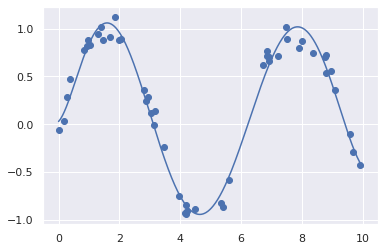

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

###Gaussian basis functions

Of course, other basis functions are possible. For example, one useful pattern is to fit
a model that is not a sum of polynomial bases, but a sum of Gaussian bases.

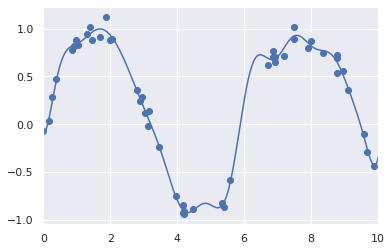

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Uniformly spaced Gaussian features for one-dimensional input"""

  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod
  def _gauss_basis(x, y, width, axis=None):
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis))

  def fit(self, X, y=None):
    # create N centers spread along the data range
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self

  def transform(self, X):
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)


gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process
of your data that makes you think one basis or another might be appropriate, you can
use them as well.

#Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting. For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good.

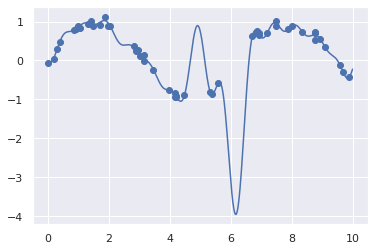

In [ ]:
# overfitting
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]));

With the data projected to the $30$-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations

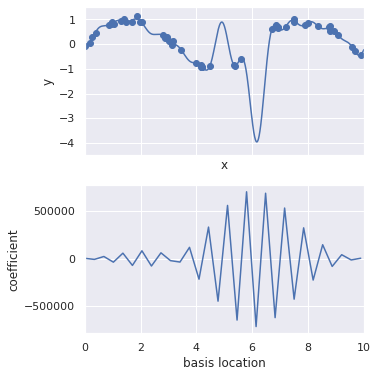

In [ ]:
def basis_plot(model, title=None):
  fig, ax = plt.subplots(2, sharex=True, figsize=(5,6))
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-4.5, 1.5))
  if title:
    ax[0].set_title(title)
  ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))


model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel shows the amplitude of the basis function at each
location. This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

Let's remember:

$\qquad \qquad \qquad The\,\, point\,\, of\,\, regularization\,\, is\,\, to\,\, avoid\,\, overfitting\,\, (and\,\, hopefully \,\, eliminate \,\, redundant \,\, features).$

##A note about Quadratically Constrained Quadratic Program  (QCQP)

The main idea of regularization is to add constraint on the $\mathbf{w}$ so that its components could not be arbitrarily large. In particularly you can demand


$$
\|\mathbf{w}\|^2=\mathbf{w}^{\top} \mathbf{w}\leq r
$$

Note that $\mathbf{w}^{\top} \mathbf{w}$ is quadratic function.
In mathematical optimization, a quadratically constrained quadratic program (QCQP) is an optimization problem in which both the objective function and the constraints are quadratic functions. It has the form

$$
\begin{aligned}
&\text{Minimize loss function } &E({\mathbf{w}}), \\
&\text{subjected to constraint }\qquad &C({\mathbf{w}}) \leq r,
\end{aligned}
$$

where $E({\mathbf{w}})$ and $C({\mathbf{w}})$ are quadratic functions:

$$
\begin{aligned}
E({\mathbf{w}})={\mathbf{w}}^{\top} E_2 {\mathbf{w}}+E_1 {\mathbf{w}}+E_0, \\
C({\mathbf{w}})={\mathbf{w}}^{\top} C_2 {\mathbf{w}}+C_1 {\mathbf{w}}+C_0.
\end{aligned}
$$

where $C$ is a convex function.

It turns out that the problem above could be reformulated in the following way (dual problem):

$$
\begin{aligned}
\text{Minimize  } \mathcal{L}(\mathbf{w})=E(\mathbf{w})+\alpha \cdot C(\mathbf{w})
\end{aligned}
$$

for some $\alpha$.
$\mathcal{L}(\mathbf{w})$ is called Lagrange function and $\alpha$ - Lagrange multiplier.
This problem is simpler and could be solved with standard methods (e.g. gradient descent method).


##Ridge regression ($L_2$ regularization)

Ridge regression or $L_2$ regularization is also known as **Tikhonov** or **Tikhonov-Phillips regularization**. This proceeds by introducing constraint on the sum of squares ($2$-norms) of the model coefficients that essentially forces coefficients to shrink.
In essence we solving QCQP

$$
\begin{aligned}
&\text{Minimize loss function  }\qquad  \text{SSE}(\mathbf{w}),\\
&\text{subjected to constraint   }\qquad \| \mathbf{w}\|^2 \leq r.
\end{aligned}
$$

Geometrically we are looking for the point where level curves of $\text{SSE}(\mathbf{w})$ function touches the $L_2$ metric ball of radius $r$ centered at $\mathbf{0}$.





In [1]:
#@title $L_2$ regularization
%%html

<img src='https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/l2_regularization.svg'>
</img>

We can reformulate this in terms of Lagrangian (that is called **Ridge fit function** in this context)

$$
\mathcal{L}(\mathbf{w})=E_{\text{Ridge}}(\mathbf{w})=\text{SSE}(\mathbf{w})+\alpha \| \mathbf{w}\|^2,
$$

Note that we have added the following penalty on the standard regression model loss function:

$$
E_2(\mathbf{w}) = \alpha  \| \mathbf{w}\|^2.
$$

where

$$
\| \mathbf{w}\|^2=\sum_{i=0}^n w_i^2.
$$

$\alpha$ is a free parameter that controls the strength of the penalty. This type of
penalized model is built into `Scikit-Learn` with the `Ridge` model.

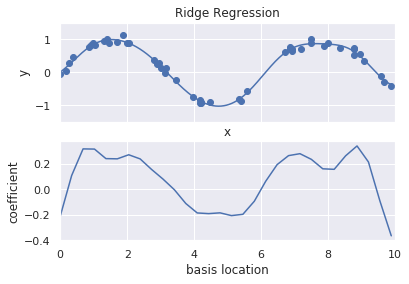

In [ ]:
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

*  $\alpha \to 0$ --- original linear regression
*  $\alpha \to \infty$ --- regression totally suppressed
*  it can be computed very efficiently—at hardly more computational cost than the original linear regression model

##Regression vs Ridge regression in 2D

Suppose you generate random points and use OLS and Ridge regression. If we are seeking for equation

$$
y(x)=a+bx.
$$

Ridge penalty reads as

$$
E_2(b) = \alpha \, b^2.
$$

As this function is less for lesser $b$ it prefers low line slopes. The more is $\alpha$ the more shelved our line will be.

In general Ridge regression penalizes high slopes of the regression hyperplane that why it's sometimes called weights decay method. It's often said that Ridge does shrinkage of coefficients.

In [ ]:
#@title #Ridge vs Simple Regressions

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rng = np.random.RandomState(1)
x = 10 * rng.rand(20)
y = 2 * x - 5 + 5*rng.randn(20)

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
reg_xs = [0.0, 10.0]
ys = model.predict([[reg_xs[0]], [reg_xs[1]]])
simple_regression = [ys[0], ys[1]]

ridge = []
for a in range(0, 1050, 50):
  model_ridge=make_pipeline(Ridge(alpha=a, fit_intercept=True))
  model_ridge.fit(x[:, np.newaxis], y)
  ys = model_ridge.predict([[reg_xs[0]], [reg_xs[1]]])
  ridge.append([a, ys[0], ys[1]])
#ridge

main_str = '''
<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

<table>
<tr><td>α :<td><td>
<input type="range" min="0" max="20" value="0" id="range_slider"
oninput="repaint();">
</td><td id="output"></td></tr></table>
<div id="cell_for_plot"> </div>

<script>

var data_x = ''' + str(x.tolist()) + '''
var data_y = ''' + str(y.tolist()) + '''
var line_x = ''' + str(reg_xs) + '''
var line_y = ''' + str(simple_regression) + '''
var alphas = ''' + str([w[0] for w in ridge]) + '''
var ridge_y = ''' + str([[w[1], w[2]] for w in ridge]) + '''

function repaint() {
  var val = parseInt(document.getElementById("range_slider").value);
  output.innerHTML = alphas[val];
  paint(val);
}

function paint(idx) {
  data = [{
    x: data_x,
    y: data_y,
    name: 'datapoints',
    mode: 'markers',
    marker: {
      size: 12,
      opacity: 0.8
    },
    type: 'scatter'
  },{
    x: line_x,
    y: line_y,
    name: 'simple regression',
    mode: 'lines',
    type: 'scatter'
  },{
    x: line_x,
    y: ridge_y[idx],
    name: 'ridge regression',
    mode: 'lines',
    type: 'scatter'
  }];

  var cell_for_plot = document.getElementById("cell_for_plot");
  var layout = {
      title: 'Ridge Regression',
      xaxis: {'domain': [0.0, 1.0]},
      yaxis: {'domain': [0.0, 1.0]},
      width: 600,
      height: 600,
      showlegend: true,
    };
Plotly.newPlot(cell_for_plot, data, layout);

}

repaint();

</script>
'''

import IPython
display(IPython.display.HTML(main_str))

α :,


##Lasso regularization ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves different constraint on ($1$-norm) of regression coefficient $\mathbf{w}$:

$$
\begin{aligned}
&\text{Minimize loss function} &\text{SSE}(\mathbf{w}), \\
&\text{subjected to constraint} &\sum_i |w_i| \leq r.
\end{aligned}
$$





In [ ]:
#@title ##L_1 regularization
%%html

<svg width="126.15mm" height="118.51mm" version="1.1" viewBox="0 0 126.15 118.51" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42995" fill-rule="evenodd" stroke="#000" stroke-opacity=".42995" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42995" fill-rule="evenodd" stroke="#000" stroke-opacity=".42995" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-40.869 -168.58)">
  <g stroke="#000">
   <g transform="rotate(-28.049 443.1 217.42)">
    <g fill="#f00" fill-opacity=".17874" stroke="none" stroke-dashoffset="10.353" stroke-linecap="square">
     <ellipse transform="matrix(.97157 -.23675 .23707 .97149 0 0)" cx="134.8" cy="96.173" rx="29.069" ry="11.346" stroke-opacity=".38647" stroke-width=".56"/>
     <ellipse transform="matrix(.96993 -.24338 .29901 .95425 0 0)" cx="132.82" cy="97.22" rx="21.549" ry="8.2096" stroke-opacity=".41961" stroke-width=".55046"/>
     <ellipse transform="matrix(.97421 -.22565 .26699 .9637 0 0)" cx="129.32" cy="94.467" rx="34.47" ry="15.31" stroke-opacity=".30435" stroke-width=".56526"/>
    </g>
    <g transform="matrix(.75754 .40357 .40357 -.75754 -231.92 599.46)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.7476" ns0:preamble="default_packages.tex" ns0:text="$w_1 w_2$\n" xml:space="preserve"><g fill-opacity=".74396" stroke-width="0"><path d="m158.31 715.18v0.0169l9e-3 0.0254v0.0169l0.018 0.0338v0.0254l9e-3 0.0423 0.0167 0.0423 0.027 0.1269 9e-3 0.0169v0.0169l9e-3 0.0169v0.0254l9e-3 0.0169v0.0169l9e-3 0.0169v9e-3l9e-3 0.0169v0.0349l9e-3 9e-3v0.027c0 0.15231-0.11661 0.22845-0.24155 0.22845-0.1 0-0.24989-0.0677-0.3082-0.23691-0.025-0.0592-0.41648-1.6669-0.47479-1.8868-0.0583-0.25383-0.075-0.39767-0.075-0.54998 0-0.0931 0-0.11 9e-3 -0.1523-0.19158-0.44845-0.44147-0.71075-0.76632-0.71075-0.65805 0-0.65805 0.62614-0.65805 0.76998 0 0.27075 0.0417 0.59228 0.43315 1.633 0.0833 0.24536 0.13328 0.36382 0.13328 0.53304 0 0.38075-0.26655 0.69382-0.6747 0.69382-0.79131 0-1.0995-1.2184-1.0995-1.2946 0-0.0846 0.0833-0.0846 0.1-0.0846 0.0833 0 0.0916 0.0169 0.13327 0.15232 0.2249 0.77843 0.54975 1.0407 0.84129 1.0407 0.0749 0 0.20824-9e-3 0.20824-0.27922 0-0.21152-0.0916-0.44844-0.14994-0.59229-0.3665-0.98996-0.46645-1.3707-0.46645-1.6922 0-0.76997 0.55808-1.0576 1.1745-1.0576 0.1416 0 0.53309 0 0.86629 0.58381 0.21656-0.53304 0.7913-0.58381 1.0412-0.58381 0.62472 0 0.9829 0.5246 1.2078 1.0323 0.27487 0.65151 0.54143 1.7768 0.54143 2.183 0 0.46537-0.22491 0.59229-0.36651 0.59229-0.20823 0-0.41648-0.21999-0.41648-0.40614 0-0.10999 0.0583-0.16076 0.13327-0.22845 0.0917-0.0931 0.29154-0.31307 0.29154-0.71074 0-0.28768-0.24156-1.1169-0.44979-1.5399-0.21658-0.44844-0.50812-0.74459-0.91627-0.7446-0.3915 0-0.61639 0.25385-0.61639 0.73614 0 0.23691 0.0583 0.49074 0.0916 0.6092z"/><path d="m162.37 714.81v0.072l-9e-3 9e-3v0.045l-0.018 0.018v9e-3l-9e-3 9e-3h-9e-3l-9e-3 9e-3h-0.036l-9e-3 9e-3h-0.09c-0.37484-0.37229-0.90794-0.38075-1.1412-0.38075v-0.21153c0.13328 0 0.52478 0 0.8413 0.16921l-1e-5 -3.0037c0-0.19461 0-0.27075-0.58307-0.27075h-0.21658v-0.21153c0.1 9e-3 0.81631 0.0254 1.0329 0.0254 0.18325 0 0.91626-0.0169 1.0412-0.0254v0.21153h-0.21658c-0.58306 0-0.58306 0.0761-0.58306 0.27075z"/><path d="m45.964 817.89 0.0083 0.0169v0.0254l0.0083 0.0169v0.0169l0.0083 0.0169v0.0254l0.01665 0.0423 0.0332 0.1692 0.0166 0.0338v0.0169l0.0083 0.0254v0.0169l0.0083 0.0169v0.0259l0.0083 0.0169v0.0259l0.0083 9e-3v0.036c0 0.1523-0.11662 0.22845-0.24156 0.22845-0.09996 0-0.24989-0.0677-0.3082-0.23691-0.02498-0.0592-0.41648-1.6669-0.47479-1.8868-0.05831-0.25385-0.07496-0.39768-0.07496-0.54999 0-0.0931 0-0.10999 0.0083-0.1523-0.18325-0.44844-0.43314-0.71074-0.758-0.71074-0.66637 0-0.66637 0.62613-0.66637 0.76996 0 0.27076 0.04165 0.59229 0.43314 1.633 0.09163 0.24537 0.1416 0.36383 0.1416 0.53305 0 0.38076-0.27488 0.69382-0.68303 0.69382-0.79131 0-1.0995-1.2184-1.0995-1.2946 0-0.0846 0.08329-0.0846 0.09996-0.0846 0.08329 0 0.09163 0.0169 0.13327 0.15231 0.2249 0.77842 0.54976 1.0407 0.84129 1.0407 0.07496 0 0.20824-9e-3 0.20824-0.27923 0-0.21153-0.09162-0.44844-0.14993-0.59228-0.3665-0.98996-0.46646-1.3707-0.46646-1.6922-1e-6 -0.76998 0.55808-1.0577 1.1828-1.0577 0.1416 0 0.5331 0 0.85795 0.58384 0.21657-0.53307 0.79131-0.58384 1.0412-0.58384 0.62472 1e-5 0.99122 0.52461 1.2078 1.0323 0.28321 0.65152 0.54976 1.7769 0.54976 2.183 0 0.46536-0.23323 0.59228-0.3665 0.59228-0.20824 0-0.41648-0.22-0.41648-0.40613 0-0.11 0.04998-0.16077 0.12494-0.22846 0.09163-0.0931 0.29987-0.31306 0.29987-0.71074 0-0.28768-0.24156-1.1169-0.45813-1.5399-0.21657-0.44845-0.50811-0.74458-0.91626-0.74458-0.39149 0-0.61639 0.25382-0.61639 0.73611 0 0.23692 0.05831 0.49076 0.09163 0.60921z"/><path d="m51.012 814.85h-0.19991c-0.01665-0.13537-0.07496-0.48228-0.14993-0.5415-0.04998-0.0339-0.49978-0.0339-0.57474-0.0339h-1.0745c0.60806 0.54998 0.8163 0.71074 1.1661 0.98997 0.43314 0.34691 0.83296 0.71073 0.83296 1.2692 1e-6 0.71073-0.61639 1.1507-1.3661 1.1507-0.71635 0-1.2078-0.51613-1.2078-1.0576-1e-6 -0.29614 0.24989-0.32999 0.3082-0.32999 0.1416 0 0.3082 0.10154 0.3082 0.31306 0 0.11001-0.04165 0.31307-0.34151 0.31307 0.17492 0.4146 0.57474 0.54997 0.84962 0.54997 0.58307 0 0.88294-0.4569 0.88294-0.93918-1e-6 -0.50768-0.35818-0.91382-0.54976-1.1253l-1.3994-1.4046c-0.0583-0.0508-0.0583-0.0592-0.0583-0.22846h2.3989z"/></g><g transform="matrix(1.5 0 0 -1.5 -151.46 1212.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0 r (\\hat{w_1}, \\hat{w_2})$\n" xml:space="preserve"><path d="m135.93 331.77 2e-5 -0.1394-4e-3 -0.0697 2e-5 -0.0697-4e-3 -0.0697-9e-3 -0.0652-4e-3 -0.0697-9e-3 -0.0697-9e-3 -0.0652-0.0139-0.0697-0.0139-0.0652-0.0186-0.0697-0.0186-0.065-0.0232-0.0652-0.0279-0.065-0.0278-0.0652c-0.21391-0.44191-0.59531-0.51639-0.78602-0.51639-0.27909-4e-5 -0.61865 0.12086-0.80941 0.54877-0.14888 0.32093-0.17218 0.67908-0.17222 1.0512-4e-5 0.3442 0.0185 0.76284 0.20919 1.1117 0.19998 0.37678 0.53951 0.4652 0.76743 0.46522l1e-5 -0.10233c-0.18139-2e-5 -0.45582-0.11168-0.53951-0.55823-0.0512-0.27444-0.0511-0.70236-0.0511-0.97214 3e-5 -0.2977 7e-5 -0.60003 0.0374-0.85121 0.0884-0.54885 0.43729-0.59068 0.55359-0.59066 0.14884 1e-5 0.45582 0.0838 0.54415 0.53962 0.0464 0.26048 0.0464 0.60933 0.0464 0.90237-4e-5 0.34421-8e-5 0.66051-0.0512 0.95355-0.0699 0.44187-0.33497 0.57672-0.53963 0.5767l-1e-5 0.10233c0.24652 4e-5 0.60004-0.093 0.80475-0.53481 0.14887-0.31629 0.17218-0.6791 0.17222-1.0419z" fill-opacity=".74396" stroke-width="0"/><g fill-opacity=".78261" stroke-width="0"><path d="m168.93 295.02v-3e-3l-3e-3 -3e-3v-3e-3l1e-5 -3e-3h-3e-3v-3e-3l-3e-3 -3e-3v-3e-3l-3e-3 -3e-3h-3e-3v-3e-3l-0.018-0.018v-3e-3h-3e-3v-3e-3l-3e-3 -3e-3h-3e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3v-3e-3c-0.51892-0.51905-0.65169-1.2996-0.65162-1.9307 9e-5 -0.71828 0.15793-1.4365 0.66865-1.9513 0.0541-0.0498 0.0541-0.0581 0.0541-0.0705 1e-5 -0.0291-0.0167-0.0416-0.0416-0.0416-0.0416 0-0.41521 0.28228-0.66023 0.80538-0.2118 0.45253-0.26167 0.91338-0.2617 1.258-3e-5 0.32383 0.0456 0.82206 0.27388 1.2871 0.24903 0.50655 0.60607 0.77644 0.6476 0.77644 0.0249 1e-5 0.0416-0.0125 0.0416-0.0416z"/><polygon transform="matrix(.41518 4.5923e-5 4.5917e-5 -.41518 101.74 587.61)" points="168.14 714.02 166.8 712.67 166.98 712.49 168.14 713.5 169.29 712.49 169.47 712.67"/><path d="m171.09 292.64v-7e-3l3e-3 -0.0125 2e-5 -7e-3 3e-3 -7e-3v-7e-3l3e-3 -0.0125 6e-3 -0.0412 7e-3 -0.0207 3e-3 -0.0206 3e-3 -0.0207 3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.0125l3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.01l3e-3 -7e-3v-0.012l3e-3 -3e-3v-3e-3c2e-5 -0.0748-0.0582-0.11208-0.12039-0.11208-0.0497 0-0.12456 0.0332-0.15363 0.11624-0.0125 0.0291-0.20767 0.81789-0.23675 0.92584-0.0291 0.12454-0.0374 0.19511-0.0374 0.26986 0 0.0457 0 0.0539 3e-3 0.0748-0.0955 0.22003-0.22009 0.34872-0.38201 0.34871-0.33214-4e-5 -0.33211-0.30728-0.33208-0.37786 0-0.13284 0.0207-0.29062 0.21595-0.80128 0.0457-0.12039 0.0706-0.17851 0.0706-0.26155 3e-5 -0.18684-0.13698-0.34045-0.34041-0.34048-0.39027-5e-5 -0.54395 0.59779-0.54395 0.63518-1e-5 0.0416 0.0416 0.0416 0.0497 0.0416 0.0416 1e-5 0.0457-7e-3 0.0665-0.0748 0.11221-0.38194 0.27408-0.51063 0.41524-0.51062 0.0374 1e-5 0.10385 3e-3 0.10375 0.13704-1e-5 0.10374-0.0457 0.22003-0.0749 0.29061-0.17858 0.48575-0.22843 0.67257-0.22844 0.83034-4e-5 0.37781 0.27396 0.519 0.58534 0.51903 0.0706 1e-5 0.26571 3e-5 0.43182-0.28642 0.10797 0.26157 0.39439 0.28651 0.51895 0.28653 0.30723 3e-5 0.48994-0.25736 0.59792-0.50645 0.1412-0.31969 0.27412-0.87186 0.27413-1.0711 3e-5 -0.22836-0.11209-0.29065-0.18264-0.29067-0.10375 0-0.2076 0.10797-0.2076 0.19929-1e-5 0.0538 0.0249 0.079 0.0622 0.11207 0.0456 0.0457 0.14946 0.15362 0.14943 0.34875-1e-5 0.14117-0.12046 0.54804-0.22843 0.75562-0.10796 0.22002-0.2533 0.36533-0.45259 0.3653-0.19514-2e-5 -0.30721-0.12458-0.30718-0.36123 1e-5 -0.11626 0.0291-0.24081 0.0457-0.29893z"/><path d="m173.1 292.82v-0.036l-3e-3 -3e-3v-3e-3l1e-5 -3e-3 -3e-3 -3e-3v-3e-3h-3e-3v-3e-3h-6e-3v-3e-3h-0.015v-3e-3h-0.027l-3e-3 -2e-5h-3e-3c-0.1827 0.18266-0.44842 0.18679-0.56881 0.18678l-2e-5 0.10375c0.0705 2e-5 0.26156 3e-5 0.42349-0.083l-1.5e-4 1.4739c-1e-5 0.0955-1e-5 0.13284-0.29065 0.13282l-0.11208-1e-5 -1e-5 0.10375c0.054-3e-3 0.41103-0.0125 0.51898-0.0125 0.0872 1e-5 0.45669 7e-3 0.51897 0.0126l1e-5 -0.10374-0.11207-2e-5c-0.29064-2e-5 -0.29063-0.0374-0.29063-0.13289z"/><path d="m174.83 294.03v-0.0704l-3e-3 -0.0249 2e-5 -0.0206-3e-3 -0.0206-3e-3 -0.0249-3e-3 -0.0168-6e-3 -0.0412-7e-3 -0.0168-3e-3 -0.0168-7e-3 -0.0168-7e-3 -0.0167-7e-3 -0.0168-7e-3 -0.0125-7e-3 -0.0168-7e-3 -0.0125-0.0125-7e-3 -7e-3 -0.0125-0.0195-0.0195-0.0124-7e-3 -0.0125-7e-3 -0.0125-3e-3 -0.0125-7e-3 -0.025-6e-3 -0.0168-3e-3 -0.0125-2e-5 -0.0168-3e-3h-0.0125c-0.13699-1e-5 -0.22005 0.10375-0.22005 0.22003-1e-5 0.11207 0.083 0.21589 0.22002 0.21591 0.0498 0 0.10375-0.0124 0.14532-0.0497 0.0125-7e-3 0.0167-0.0125 0.0206-0.0125 3e-3 0 7e-3 3e-3 7e-3 0.0581-3e-5 0.30723-0.14538 0.55633-0.28239 0.68917-0.0457 0.0456-0.0457 0.0539-0.0457 0.0665 0 0.0291 0.0207 0.0457 0.0416 0.0457 0.0456 0 0.37369-0.31551 0.37376-0.80127z"/><polygon transform="matrix(.41518 4.5923e-5 4.5917e-5 -.41518 101.74 587.61)" points="184.17 714.02 182.84 712.67 183.01 712.49 184.17 713.5 185.32 712.49 185.5 712.67"/><path d="m177.74 292.64v-7e-3l3e-3 -0.0125v-7e-3l3e-3 -7e-3v-7e-3l3e-3 -0.0125 3e-3 -0.0206 3e-3 -0.0207 7e-3 -0.0206 3e-3 -0.0207 3e-3 -0.0206 3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.0125l3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.01l3e-3 -7e-3v-6e-3l1e-5 -3e-3v-3e-3l3e-3 -3e-3v-3e-3c1e-5 -0.0748-0.0581-0.11209-0.1204-0.11209-0.0498 0-0.12454 0.0332-0.15362 0.11625-0.0125 0.0291-0.20768 0.81788-0.23676 0.92583-0.0292 0.12452-0.0374 0.19512-0.0374 0.26985-1e-5 0.0456-1e-5 0.0538 3e-3 0.0748-0.0955 0.22004-0.22009 0.34874-0.38202 0.34869-0.33214-2e-5 -0.33211-0.30725-0.33209-0.37783 2e-5 -0.13286 0.0207-0.29063 0.21598-0.80128 0.0457-0.1204 0.0706-0.17851 0.0706-0.26155 1e-5 -0.18684-0.13698-0.34046-0.34043-0.34049-0.39026-6e-5 -0.54396 0.59781-0.54396 0.63516 0 0.0416 0.0416 0.0416 0.0497 0.0416 0.0416 0 0.0457-7e-3 0.0665-0.0748 0.1122-0.38195 0.27409-0.51064 0.41941-0.51062 0.0332 0 0.0996 3e-3 0.0996 0.137-1e-5 0.10385-0.0457 0.22006-0.0749 0.29063-0.17858 0.48574-0.22843 0.67257-0.22845 0.83035-3e-5 0.37782 0.27397 0.51901 0.58535 0.51904 0.0706 0 0.26573 3e-5 0.43184-0.28644 0.10795 0.26158 0.39437 0.28653 0.51892 0.28654 0.30724 4e-5 0.48996-0.25736 0.59793-0.50646 0.1412-0.31966 0.27411-0.87185 0.27414-1.0711 1e-5 -0.22836-0.11208-0.29065-0.18265-0.29065-0.10385-1e-5 -0.20761 0.10797-0.20762 0.19926-1e-5 0.054 0.0249 0.079 0.0623 0.11208 0.0456 0.0457 0.14945 0.15363 0.14942 0.34877-1e-5 0.14116-0.12045 0.54802-0.22843 0.75561-0.10797 0.22003-0.25329 0.36534-0.45259 0.3653-0.19513-2e-5 -0.30722-0.12458-0.3072-0.36124 2e-5 -0.11625 0.0291-0.2408 0.0457-0.29892z"/><path d="m180.25 294.13-0.0996-1e-5c-7e-3 0.0665-0.0374 0.23665-0.0749 0.2657-0.0206 0.0167-0.24496 0.0166-0.28648 0.0166l-0.53557-7e-5c0.30726-0.26983 0.40691-0.34871 0.5813-0.48569 0.2159-0.17022 0.41522-0.34871 0.41524-0.62274 5e-5 -0.34875-0.30716-0.56467-0.67666-0.56471-0.36122-4e-5 -0.60621 0.25319-0.60624 0.5189-1e-5 0.14533 0.12455 0.16194 0.15361 0.16194 0.0705 1e-5 0.15361-0.0498 0.15362-0.1536 0-0.054-0.0206-0.15362-0.1702-0.15362 0.0913-0.20344 0.28651-0.26984 0.42351-0.26983 0.29063 3e-5 0.44007 0.22426 0.44004 0.46089-3e-5 0.24913-0.17856 0.44838-0.26992 0.55217l-0.70174 0.68913c-0.0291 0.0249-0.0291 0.0291-0.0291 0.11208l1.1957 1.4e-4z"/><path d="m181.84 293 1e-5 -0.0291v-0.0996l-3e-3 -0.0705-3e-3 -0.0706-7e-3 -0.0748-7e-3 -0.079-0.0124-0.0831-0.0125-0.0831-0.0168-0.083-0.0206-0.0871-0.0207-0.0872-0.0248-0.0871-0.0291-0.0871-0.0332-0.0872-0.0168-0.0456-0.0206-0.0457-0.0168-0.0416-0.0206-0.0457c-0.24906-0.50656-0.60607-0.77648-0.6476-0.77648-0.0249 0-0.0416 0.0168-0.0416 0.0416 0 0.0125 0 0.0206 0.079 0.0955 0.40682 0.41109 0.63925 1.0671 0.63915 1.9265-7e-5 0.70581-0.14963 1.4324-0.6645 1.9513-0.0539 0.0498-0.0539 0.0581-0.0539 0.0705 0 0.0249 0.0168 0.0416 0.0416 0.0416 0.0416 1e-5 0.41522-0.28226 0.66023-0.80538 0.20765-0.45252 0.25752-0.90922 0.25756-1.258z"/></g><circle transform="rotate(.0031687)" cx="179.18" cy="289.23" r=".70061" fill="#f00" stroke="none"/><circle transform="rotate(.0031687)" cx="147.27" cy="317.95" r=".7922" fill="#006ab1" fill-rule="evenodd" stroke="none"/></g></g>
   </g>
   <path d="m40.869 254.88h122.95" fill="none" marker-end="url(#a)" stroke-opacity=".42995" stroke-width=".565"/>
   <path d="m73.452 287.08v-117.39" fill="none" marker-end="url(#b)" stroke-opacity=".42995" stroke-width=".565"/>
  </g>
  <rect transform="rotate(135.06)" x="108.48" y="-251.87" width="39.082" height="39.082" fill="#0054ff" fill-opacity=".086957" stroke="#0060ab" stroke-dashoffset="10.353" stroke-linecap="square" stroke-opacity=".52157" stroke-width=".665"/>
 </g>
</svg>




The constraint function is not quadratic hence it's not QCQP. Nevertheless this function is convex and we solve this problem in the way similar to Ridge introducing


$$
E_{Lasso}(\mathbf{w})=\mathcal{L}(\mathbf{w})=\text{SSE}(\mathbf{w})+\alpha \sum_i |w_i|,
$$

Note that we have added following penalty

$$
E_1(\mathbf{w}) = \alpha \sum_i |w_i|.
$$

Though Lasso is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible; that is, it preferentially sets model coefficients to exactly zero. Geometrically this means that level set lines of $\text{SSE}(\mathbf{w})$ intersect $L_1$ ball at one of its corners. As number of predictors increase, the multidimensional diamond has an increasing number of corners, and so it is highly likely that some coefficients will be set equal to zero.

In [ ]:
#@title ##L_1 regularization
%%html

<svg width="126.15mm" height="118.51mm" version="1.1" viewBox="0 0 126.15 118.51" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42995" fill-rule="evenodd" stroke="#000" stroke-opacity=".42995" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".42995" fill-rule="evenodd" stroke="#000" stroke-opacity=".42995" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-40.869 -168.58)">
  <g stroke="#000">
   <path d="m40.869 254.88h122.95" fill="none" marker-end="url(#a)" stroke-opacity=".42995" stroke-width=".565"/>
   <path d="m73.452 287.08v-117.39" fill="none" marker-end="url(#b)" stroke-opacity=".42995" stroke-width=".565"/>
   <g transform="rotate(-28.049 443.1 217.42)">
    <g fill="#f00" fill-opacity=".17874" stroke="none" stroke-dashoffset="10.353" stroke-linecap="square">
     <ellipse transform="matrix(.97421 -.22565 .26699 .9637 0 0)" cx="128.95" cy="76.249" rx="34.47" ry="15.31" stroke-opacity=".30435" stroke-width=".56526"/>
     <ellipse transform="matrix(.97157 -.23675 .23707 .97149 0 0)" cx="133.86" cy="77.96" rx="29.069" ry="11.346" stroke-opacity=".38647" stroke-width=".56"/>
     <ellipse transform="matrix(.96993 -.24338 .29901 .95425 0 0)" cx="133.05" cy="78.97" rx="21.549" ry="8.2096" stroke-opacity=".41961" stroke-width=".55046"/>
    </g>
    <g transform="matrix(.75754 .40357 .40357 -.75754 -231.92 599.46)" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="1.7476" ns0:preamble="default_packages.tex" ns0:text="$w_1 w_2$\n" xml:space="preserve"><g fill-opacity=".74396" stroke-width="0"><path d="m158.31 715.18v0.0169l9e-3 0.0254v0.0169l0.018 0.0338v0.0254l9e-3 0.0423 0.0167 0.0423 0.027 0.1269 9e-3 0.0169v0.0169l9e-3 0.0169v0.0254l9e-3 0.0169v0.0169l9e-3 0.0169v9e-3l9e-3 0.0169v0.0349l9e-3 9e-3v0.027c0 0.15231-0.11661 0.22845-0.24155 0.22845-0.1 0-0.24989-0.0677-0.3082-0.23691-0.025-0.0592-0.41648-1.6669-0.47479-1.8868-0.0583-0.25383-0.075-0.39767-0.075-0.54998 0-0.0931 0-0.11 9e-3 -0.1523-0.19158-0.44845-0.44147-0.71075-0.76632-0.71075-0.65805 0-0.65805 0.62614-0.65805 0.76998 0 0.27075 0.0417 0.59228 0.43315 1.633 0.0833 0.24536 0.13328 0.36382 0.13328 0.53304 0 0.38075-0.26655 0.69382-0.6747 0.69382-0.79131 0-1.0995-1.2184-1.0995-1.2946 0-0.0846 0.0833-0.0846 0.1-0.0846 0.0833 0 0.0916 0.0169 0.13327 0.15232 0.2249 0.77843 0.54975 1.0407 0.84129 1.0407 0.0749 0 0.20824-9e-3 0.20824-0.27922 0-0.21152-0.0916-0.44844-0.14994-0.59229-0.3665-0.98996-0.46645-1.3707-0.46645-1.6922 0-0.76997 0.55808-1.0576 1.1745-1.0576 0.1416 0 0.53309 0 0.86629 0.58381 0.21656-0.53304 0.7913-0.58381 1.0412-0.58381 0.62472 0 0.9829 0.5246 1.2078 1.0323 0.27487 0.65151 0.54143 1.7768 0.54143 2.183 0 0.46537-0.22491 0.59229-0.36651 0.59229-0.20823 0-0.41648-0.21999-0.41648-0.40614 0-0.10999 0.0583-0.16076 0.13327-0.22845 0.0917-0.0931 0.29154-0.31307 0.29154-0.71074 0-0.28768-0.24156-1.1169-0.44979-1.5399-0.21658-0.44844-0.50812-0.74459-0.91627-0.7446-0.3915 0-0.61639 0.25385-0.61639 0.73614 0 0.23691 0.0583 0.49074 0.0916 0.6092z"/><path d="m162.37 714.81v0.072l-9e-3 9e-3v0.045l-0.018 0.018v9e-3l-9e-3 9e-3h-9e-3l-9e-3 9e-3h-0.036l-9e-3 9e-3h-0.09c-0.37484-0.37229-0.90794-0.38075-1.1412-0.38075v-0.21153c0.13328 0 0.52478 0 0.8413 0.16921l-1e-5 -3.0037c0-0.19461 0-0.27075-0.58307-0.27075h-0.21658v-0.21153c0.1 9e-3 0.81631 0.0254 1.0329 0.0254 0.18325 0 0.91626-0.0169 1.0412-0.0254v0.21153h-0.21658c-0.58306 0-0.58306 0.0761-0.58306 0.27075z"/><path d="m45.964 817.89 0.0083 0.0169v0.0254l0.0083 0.0169v0.0169l0.0083 0.0169v0.0254l0.01665 0.0423 0.0332 0.1692 0.0166 0.0338v0.0169l0.0083 0.0254v0.0169l0.0083 0.0169v0.0259l0.0083 0.0169v0.0259l0.0083 9e-3v0.036c0 0.1523-0.11662 0.22845-0.24156 0.22845-0.09996 0-0.24989-0.0677-0.3082-0.23691-0.02498-0.0592-0.41648-1.6669-0.47479-1.8868-0.05831-0.25385-0.07496-0.39768-0.07496-0.54999 0-0.0931 0-0.10999 0.0083-0.1523-0.18325-0.44844-0.43314-0.71074-0.758-0.71074-0.66637 0-0.66637 0.62613-0.66637 0.76996 0 0.27076 0.04165 0.59229 0.43314 1.633 0.09163 0.24537 0.1416 0.36383 0.1416 0.53305 0 0.38076-0.27488 0.69382-0.68303 0.69382-0.79131 0-1.0995-1.2184-1.0995-1.2946 0-0.0846 0.08329-0.0846 0.09996-0.0846 0.08329 0 0.09163 0.0169 0.13327 0.15231 0.2249 0.77842 0.54976 1.0407 0.84129 1.0407 0.07496 0 0.20824-9e-3 0.20824-0.27923 0-0.21153-0.09162-0.44844-0.14993-0.59228-0.3665-0.98996-0.46646-1.3707-0.46646-1.6922-1e-6 -0.76998 0.55808-1.0577 1.1828-1.0577 0.1416 0 0.5331 0 0.85795 0.58384 0.21657-0.53307 0.79131-0.58384 1.0412-0.58384 0.62472 1e-5 0.99122 0.52461 1.2078 1.0323 0.28321 0.65152 0.54976 1.7769 0.54976 2.183 0 0.46536-0.23323 0.59228-0.3665 0.59228-0.20824 0-0.41648-0.22-0.41648-0.40613 0-0.11 0.04998-0.16077 0.12494-0.22846 0.09163-0.0931 0.29987-0.31306 0.29987-0.71074 0-0.28768-0.24156-1.1169-0.45813-1.5399-0.21657-0.44845-0.50811-0.74458-0.91626-0.74458-0.39149 0-0.61639 0.25382-0.61639 0.73611 0 0.23692 0.05831 0.49076 0.09163 0.60921z"/><path d="m51.012 814.85h-0.19991c-0.01665-0.13537-0.07496-0.48228-0.14993-0.5415-0.04998-0.0339-0.49978-0.0339-0.57474-0.0339h-1.0745c0.60806 0.54998 0.8163 0.71074 1.1661 0.98997 0.43314 0.34691 0.83296 0.71073 0.83296 1.2692 1e-6 0.71073-0.61639 1.1507-1.3661 1.1507-0.71635 0-1.2078-0.51613-1.2078-1.0576-1e-6 -0.29614 0.24989-0.32999 0.3082-0.32999 0.1416 0 0.3082 0.10154 0.3082 0.31306 0 0.11001-0.04165 0.31307-0.34151 0.31307 0.17492 0.4146 0.57474 0.54997 0.84962 0.54997 0.58307 0 0.88294-0.4569 0.88294-0.93918-1e-6 -0.50768-0.35818-0.91382-0.54976-1.1253l-1.3994-1.4046c-0.0583-0.0508-0.0583-0.0592-0.0583-0.22846h2.3989z"/></g><g transform="matrix(1.5 0 0 -1.5 -151.46 1212.9)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0 r (\\hat{w_1}, \\hat{w_2})$\n" xml:space="preserve"><path d="m135.93 331.77 2e-5 -0.1394-4e-3 -0.0697 2e-5 -0.0697-4e-3 -0.0697-9e-3 -0.0652-4e-3 -0.0697-9e-3 -0.0697-9e-3 -0.0652-0.0139-0.0697-0.0139-0.0652-0.0186-0.0697-0.0186-0.065-0.0232-0.0652-0.0279-0.065-0.0278-0.0652c-0.21391-0.44191-0.59531-0.51639-0.78602-0.51639-0.27909-4e-5 -0.61865 0.12086-0.80941 0.54877-0.14888 0.32093-0.17218 0.67908-0.17222 1.0512-4e-5 0.3442 0.0185 0.76284 0.20919 1.1117 0.19998 0.37678 0.53951 0.4652 0.76743 0.46522l1e-5 -0.10233c-0.18139-2e-5 -0.45582-0.11168-0.53951-0.55823-0.0512-0.27444-0.0511-0.70236-0.0511-0.97214 3e-5 -0.2977 7e-5 -0.60003 0.0374-0.85121 0.0884-0.54885 0.43729-0.59068 0.55359-0.59066 0.14884 1e-5 0.45582 0.0838 0.54415 0.53962 0.0464 0.26048 0.0464 0.60933 0.0464 0.90237-4e-5 0.34421-8e-5 0.66051-0.0512 0.95355-0.0699 0.44187-0.33497 0.57672-0.53963 0.5767l-1e-5 0.10233c0.24652 4e-5 0.60004-0.093 0.80475-0.53481 0.14887-0.31629 0.17218-0.6791 0.17222-1.0419z" fill-opacity=".74396" stroke-width="0"/><g fill-opacity=".86275" stroke-width="0"><path d="m158.97 284.96v-3e-3l-3e-3 -3e-3v-3e-3l1e-5 -3e-3h-3e-3v-3e-3l-3e-3 -3e-3v-3e-3l-3e-3 -3e-3h-3e-3v-3e-3l-0.018-0.018v-3e-3h-3e-3v-3e-3l-3e-3 -3e-3h-3e-3v-3e-3l-3e-3 -3e-3h-3e-3l-3e-3 -3e-3v-3e-3c-0.51892-0.51905-0.65169-1.2996-0.65162-1.9307 9e-5 -0.71828 0.15793-1.4365 0.66865-1.9513 0.0541-0.0498 0.0541-0.0581 0.0541-0.0705 1e-5 -0.0291-0.0167-0.0416-0.0416-0.0416-0.0416 0-0.41521 0.28228-0.66023 0.80538-0.2118 0.45253-0.26167 0.91338-0.2617 1.258-3e-5 0.32383 0.0456 0.82206 0.27388 1.2871 0.24903 0.50655 0.60607 0.77644 0.6476 0.77644 0.0249 1e-5 0.0416-0.0125 0.0416-0.0416z"/><polygon transform="matrix(.41518 4.5923e-5 4.5917e-5 -.41518 91.775 577.54)" points="166.8 712.67 166.98 712.49 168.14 713.5 169.29 712.49 169.47 712.67 168.14 714.02"/><path d="m161.12 282.57v-7e-3l3e-3 -0.0125 2e-5 -7e-3 3e-3 -7e-3v-7e-3l3e-3 -0.0125 6e-3 -0.0412 7e-3 -0.0207 3e-3 -0.0206 3e-3 -0.0207 3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.0125l3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.01l3e-3 -7e-3v-0.012l3e-3 -3e-3v-3e-3c2e-5 -0.0748-0.0582-0.11208-0.12039-0.11208-0.0497 0-0.12456 0.0332-0.15363 0.11624-0.0125 0.0291-0.20767 0.81789-0.23675 0.92584-0.0291 0.12454-0.0374 0.19511-0.0374 0.26986 0 0.0457 0 0.0539 3e-3 0.0748-0.0955 0.22003-0.22009 0.34872-0.38201 0.34871-0.33214-4e-5 -0.33211-0.30728-0.33208-0.37786 0-0.13284 0.0207-0.29062 0.21595-0.80128 0.0457-0.12039 0.0706-0.17851 0.0706-0.26155 3e-5 -0.18684-0.13698-0.34045-0.34041-0.34048-0.39027-5e-5 -0.54395 0.59779-0.54395 0.63518-1e-5 0.0416 0.0416 0.0416 0.0497 0.0416 0.0416 1e-5 0.0457-7e-3 0.0665-0.0748 0.11221-0.38194 0.27408-0.51063 0.41524-0.51062 0.0374 1e-5 0.10385 3e-3 0.10375 0.13704-1e-5 0.10374-0.0457 0.22003-0.0749 0.29061-0.17858 0.48575-0.22843 0.67257-0.22844 0.83034-4e-5 0.37781 0.27396 0.519 0.58534 0.51903 0.0706 1e-5 0.26571 3e-5 0.43182-0.28642 0.10797 0.26157 0.39439 0.28651 0.51895 0.28653 0.30723 3e-5 0.48994-0.25736 0.59792-0.50645 0.1412-0.31969 0.27412-0.87186 0.27413-1.0711 3e-5 -0.22836-0.11209-0.29065-0.18264-0.29067-0.10375 0-0.2076 0.10797-0.2076 0.19929-1e-5 0.0538 0.0249 0.079 0.0622 0.11207 0.0456 0.0457 0.14946 0.15362 0.14943 0.34875-1e-5 0.14117-0.12046 0.54804-0.22843 0.75562-0.10796 0.22002-0.2533 0.36533-0.45259 0.3653-0.19514-2e-5 -0.30721-0.12458-0.30718-0.36123 1e-5 -0.11626 0.0291-0.24081 0.0457-0.29893z"/><path d="m163.14 282.75v-0.036l-3e-3 -3e-3v-3e-3l1e-5 -3e-3 -3e-3 -3e-3v-3e-3h-3e-3v-3e-3h-6e-3v-3e-3h-0.015v-3e-3h-0.027l-3e-3 -2e-5h-3e-3c-0.1827 0.18266-0.44842 0.18679-0.56881 0.18678l-2e-5 0.10375c0.0705 2e-5 0.26156 3e-5 0.42349-0.083l-1.5e-4 1.4739c-1e-5 0.0955-1e-5 0.13284-0.29065 0.13282l-0.11208-1e-5 -1e-5 0.10375c0.054-3e-3 0.41103-0.0125 0.51898-0.0125 0.0872 1e-5 0.45669 7e-3 0.51897 0.0126l1e-5 -0.10374-0.11207-2e-5c-0.29064-2e-5 -0.29063-0.0374-0.29063-0.13289z"/><path d="m164.86 283.96v-0.0704l-3e-3 -0.0249 2e-5 -0.0206-3e-3 -0.0206-3e-3 -0.0249-3e-3 -0.0168-6e-3 -0.0412-7e-3 -0.0168-3e-3 -0.0168-7e-3 -0.0168-7e-3 -0.0167-7e-3 -0.0168-7e-3 -0.0125-7e-3 -0.0168-7e-3 -0.0125-0.0125-7e-3 -7e-3 -0.0125-0.0195-0.0195-0.0124-7e-3 -0.0125-7e-3 -0.0125-3e-3 -0.0125-7e-3 -0.025-6e-3 -0.0168-3e-3 -0.0125-2e-5 -0.0168-3e-3h-0.0125c-0.13699-1e-5 -0.22005 0.10375-0.22005 0.22003-1e-5 0.11207 0.083 0.21589 0.22002 0.21591 0.0498 0 0.10375-0.0124 0.14532-0.0497 0.0125-7e-3 0.0167-0.0125 0.0206-0.0125 3e-3 0 7e-3 3e-3 7e-3 0.0581-3e-5 0.30723-0.14538 0.55633-0.28239 0.68917-0.0457 0.0456-0.0457 0.0539-0.0457 0.0665 0 0.0291 0.0207 0.0457 0.0416 0.0457 0.0456 0 0.37369-0.31551 0.37376-0.80127z"/><polygon transform="matrix(.41518 4.5923e-5 4.5917e-5 -.41518 91.775 577.54)" points="182.84 712.67 183.01 712.49 184.17 713.5 185.32 712.49 185.5 712.67 184.17 714.02"/><path d="m167.78 282.57v-7e-3l3e-3 -0.0125v-7e-3l3e-3 -7e-3v-7e-3l3e-3 -0.0125 3e-3 -0.0206 3e-3 -0.0207 7e-3 -0.0206 3e-3 -0.0207 3e-3 -0.0206 3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.0125l3e-3 -7e-3v-7e-3l3e-3 -7e-3v-0.01l3e-3 -7e-3v-6e-3l1e-5 -3e-3v-3e-3l3e-3 -3e-3v-3e-3c1e-5 -0.0748-0.0581-0.11209-0.1204-0.11209-0.0498 0-0.12454 0.0332-0.15362 0.11625-0.0125 0.0291-0.20768 0.81788-0.23676 0.92583-0.0292 0.12452-0.0374 0.19512-0.0374 0.26985-1e-5 0.0456-1e-5 0.0538 3e-3 0.0748-0.0955 0.22004-0.22009 0.34874-0.38202 0.34869-0.33214-2e-5 -0.33211-0.30725-0.33209-0.37783 2e-5 -0.13286 0.0207-0.29063 0.21598-0.80128 0.0457-0.1204 0.0706-0.17851 0.0706-0.26155 1e-5 -0.18684-0.13698-0.34046-0.34043-0.34049-0.39026-6e-5 -0.54396 0.59781-0.54396 0.63516 0 0.0416 0.0416 0.0416 0.0497 0.0416 0.0416 0 0.0457-7e-3 0.0665-0.0748 0.1122-0.38195 0.27409-0.51064 0.41941-0.51062 0.0332 0 0.0996 3e-3 0.0996 0.137-1e-5 0.10385-0.0457 0.22006-0.0749 0.29063-0.17858 0.48574-0.22843 0.67257-0.22845 0.83035-3e-5 0.37782 0.27397 0.51901 0.58535 0.51904 0.0706 0 0.26573 3e-5 0.43184-0.28644 0.10795 0.26158 0.39437 0.28653 0.51892 0.28654 0.30724 4e-5 0.48996-0.25736 0.59793-0.50646 0.1412-0.31966 0.27411-0.87185 0.27414-1.0711 1e-5 -0.22836-0.11208-0.29065-0.18265-0.29065-0.10385-1e-5 -0.20761 0.10797-0.20762 0.19926-1e-5 0.054 0.0249 0.079 0.0623 0.11208 0.0456 0.0457 0.14945 0.15363 0.14942 0.34877-1e-5 0.14116-0.12045 0.54802-0.22843 0.75561-0.10797 0.22003-0.25329 0.36534-0.45259 0.3653-0.19513-2e-5 -0.30722-0.12458-0.3072-0.36124 2e-5 -0.11625 0.0291-0.2408 0.0457-0.29892z"/><path d="m170.29 284.06-0.0996-1e-5c-7e-3 0.0665-0.0374 0.23665-0.0749 0.2657-0.0206 0.0167-0.24496 0.0166-0.28648 0.0166l-0.53557-7e-5c0.30726-0.26983 0.40691-0.34871 0.5813-0.48569 0.2159-0.17022 0.41522-0.34871 0.41524-0.62274 5e-5 -0.34875-0.30716-0.56467-0.67666-0.56471-0.36122-4e-5 -0.60621 0.25319-0.60624 0.5189-1e-5 0.14533 0.12455 0.16194 0.15361 0.16194 0.0705 1e-5 0.15361-0.0498 0.15362-0.1536 0-0.054-0.0206-0.15362-0.1702-0.15362 0.0913-0.20344 0.28651-0.26984 0.42351-0.26983 0.29063 3e-5 0.44007 0.22426 0.44004 0.46089-3e-5 0.24913-0.17856 0.44838-0.26992 0.55217l-0.70174 0.68913c-0.0291 0.0249-0.0291 0.0291-0.0291 0.11208l1.1957 1.4e-4z"/><path d="m171.88 282.93 1e-5 -0.0291v-0.0996l-3e-3 -0.0705-3e-3 -0.0706-7e-3 -0.0748-7e-3 -0.079-0.0124-0.0831-0.0125-0.0831-0.0168-0.083-0.0206-0.0871-0.0207-0.0872-0.0248-0.0871-0.0291-0.0871-0.0332-0.0872-0.0168-0.0456-0.0206-0.0457-0.0168-0.0416-0.0206-0.0457c-0.24906-0.50656-0.60607-0.77648-0.6476-0.77648-0.0249 0-0.0416 0.0168-0.0416 0.0416 0 0.0125 0 0.0206 0.079 0.0955 0.40682 0.41109 0.63925 1.0671 0.63915 1.9265-7e-5 0.70581-0.14963 1.4324-0.6645 1.9513-0.0539 0.0498-0.0539 0.0581-0.0539 0.0705 0 0.0249 0.0168 0.0416 0.0416 0.0416 0.0416 1e-5 0.41522-0.28226 0.66023-0.80538 0.20765-0.45252 0.25752-0.90922 0.25756-1.258z"/></g><circle transform="rotate(.0031687)" cx="169.22" cy="279.16" r=".70061" fill="#f00" stroke="none"/><circle transform="rotate(.0031687)" cx="137.3" cy="307.89" r=".7922" fill="#006ab1" fill-rule="evenodd" stroke="none"/></g></g>
   </g>
  </g>
  <rect transform="rotate(135.06)" x="108.48" y="-251.87" width="39.082" height="39.082" fill="#0054ff" fill-opacity=".086957" stroke="#0060ab" stroke-dashoffset="10.353" stroke-linecap="square" stroke-opacity=".52157" stroke-width=".665"/>
 </g>
</svg>





This property could be used as feature selection tool. BTW, LASSO stands for The **l**east **a**bsolute **s**hrinkage and **s**election **o**perator.

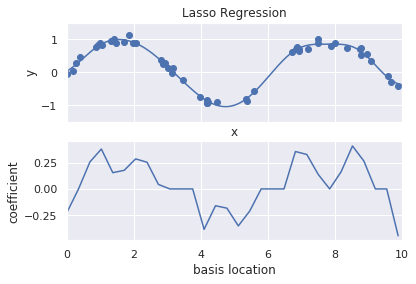

In [ ]:
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, tol=0.01))
basis_plot(model, title='Lasso Regression')

Note that some of $w_i$ are zero - that means that $i$-th feature is redundant.

In [ ]:
#@title #Lasso vs Simple Regressions

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rng = np.random.RandomState(1)
x = 10 * rng.rand(20)
y = 2 * x - 5 + 5*rng.randn(20)

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
reg_xs = [0.0, 10.0]
ys = model.predict([[reg_xs[0]], [reg_xs[1]]])
simple_regression = [ys[0], ys[1]]

ridge = []
for a in range(1, 1050, 50):
  model_ridge=make_pipeline(Lasso(alpha=a/50.0))
  model_ridge.fit(x[:, np.newaxis], y)
  ys = model_ridge.predict([[reg_xs[0]], [reg_xs[1]]])
  ridge.append([a/50.0, ys[0], ys[1]])
#ridge

main_str = '''
<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

<table>
<tr><td>α :<td><td>
<input type="range" min="0" max="20" value="0" id="range_slider"
oninput="repaint();">
</td><td id="output"></td></tr></table>
<div id="cell_for_plot"> </div>

<script>

var data_x = ''' + str(x.tolist()) + '''
var data_y = ''' + str(y.tolist()) + '''
var line_x = ''' + str(reg_xs) + '''
var line_y = ''' + str(simple_regression) + '''
var alphas = ''' + str([w[0] for w in ridge]) + '''
var ridge_y = ''' + str([[w[1], w[2]] for w in ridge]) + '''

function repaint() {
  var val = parseInt(document.getElementById("range_slider").value);
  output.innerHTML = alphas[val];
  paint(val);
}

function paint(idx) {
  data = [{
    x: data_x,
    y: data_y,
    name: 'datapoints',
    mode: 'markers',
    marker: {
      size: 12,
      opacity: 0.8
    },
    type: 'scatter'
  },{
    x: line_x,
    y: line_y,
    name: 'simple regression',
    mode: 'lines',
    type: 'scatter'
  },{
    x: line_x,
    y: ridge_y[idx],
    name: 'ridge regression',
    mode: 'lines',
    type: 'scatter'
  }];

  var cell_for_plot = document.getElementById("cell_for_plot");
  var layout = {
      title: 'Lasso Regression',
      xaxis: {'domain': [0.0, 1.0]},
      yaxis: {'domain': [0.0, 1.0]},
      width: 600,
      height: 600,
      showlegend: true,
    };
Plotly.newPlot(cell_for_plot, data, layout);

}

repaint();

</script>
'''

import IPython
display(IPython.display.HTML(main_str))

α :,


##Regularization paths

In [ ]:
#@title Regularization Paths Demo

%%html
<iframe title="Demo"
        src="https://fbeilstein.github.io/machine_learning/lecture_09_linear_regression/demo_regularization.html?rnd=2"
        width="1200" height="600"
        marginwidth="0" marginheight="0" frameborder="0"
        scrolling="no">
Your browser does not support IFrames.
</iframe>

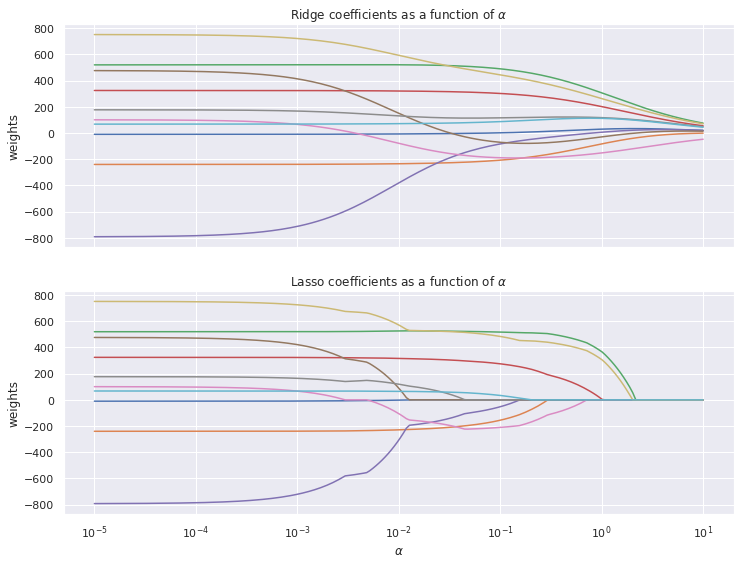

In [ ]:
#@title Ridge and Lasso paths

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
import seaborn as sns; sns.set()

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

n_alphas = 200
alphas = np.logspace(-5, 1, n_alphas)

coefs_ridge = []
coefs_lasso = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False, max_iter=10000)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False, max_iter=10000)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

fig, ax = plt.subplots(2, figsize=(12,9), sharex=True)
ax[0].plot(alphas, coefs_ridge)
ax[0].set_xscale('log')
ax[1].plot(alphas, coefs_lasso)
ax[1].set_xscale('log')

plt.xlabel( '$\\alpha$')
ax[0].set(ylabel='weights')
ax[0].set_title('Ridge coefficients as a function of $\\alpha$')
ax[1].set(ylabel='weights')
ax[1].set_title('Lasso coefficients as a function of $\\alpha$')
plt.axis('tight')
plt.show()

In [ ]:
#@title #Elastic Net

import numpy as np
from sklearn import linear_model
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

n_alphas = 200
alphas = np.logspace(-5, 1, n_alphas)

l1_ratio = 0.5

coefs_elastic = []
l1s = np.linspace(0.0, 1.0, 51)
for l1_ratio in l1s:
  temp = []
  for a in alphas:
      elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l1_ratio+0.001, fit_intercept=False, max_iter=100000)
      elastic.fit(X, y)
      temp.append(elastic.coef_.tolist())
  coefs_elastic.append(temp)
coefs_elastic = np.transpose(np.array(coefs_elastic), axes=(0,2,1))

main_str = '''
<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

<table>
<tr><td>L1 ratio :<td><td>
<input type="range" min="0" max="50" value="25" id="range_slider"
oninput="repaint();">
</td><td id="output"></td></tr></table>
<div id="cell_for_plot"> </div>

<script>

var alphas = ''' + str(alphas.tolist()) + '''
var l1_ratio = ''' + str(l1s.tolist()) + '''
var coefs_elastic = ''' + str(coefs_elastic.tolist()) + '''

function repaint() {
  var val = parseInt(document.getElementById("range_slider").value);
  output.innerHTML = l1_ratio[val];
  paint(val);
}

function paint(idx) {
  coefs = coefs_elastic[idx];
  data = [];
  for (var i = 0; i < coefs.length; ++i){
    data.push({
      x: alphas,
      y: coefs[i],
      mode: 'lines',
      type: 'scatter'
    });
  }

  var cell_for_plot = document.getElementById("cell_for_plot");
  var layout = {
      title: 'Elastic Net',
      xaxis: {'domain': [0.0, 1.0], type: 'log'},
      yaxis: {'domain': [0.0, 1.0], 'range': [-600, 600]},
      width: 800,
      height: 600,
      showlegend: false,
    };
Plotly.newPlot(cell_for_plot, data, layout);

}

repaint();

</script>
'''

import IPython
display(IPython.display.HTML(main_str))

L1 ratio :,


#Probabilistic view

##Ordinary Least Squares

OLS is applicable under following assumptions:
* weak exogeneity
* linearity
* constant variance
* independence
* lack of perfect multicollinearity (in multivariate regression independent variables should not have a linear relation between each other)

Suppose that $x$ are not random variables and only $y$ is. This property is called **weak exogeneity**.
In other words In other words weak exogeneity means that the predictor variables are assumed to be error-free—that is, not contaminated with measurement errors.

Let's assume **linearity** of $y$ with respect to $x$:

$$
y=a+bx+\epsilon \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2})
$$

it means that

$$
p(\epsilon)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{\epsilon^2}{2\sigma^2}}.
$$



In [ ]:
#@title ##Normal distribution
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.51106 0 0 -.51106 -27.022 513)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m287.02 698.93 0.0672-0.22388 0.0448-0.12314 0.0448-0.13433 0.0448-0.14553 0.0224-0.0672 0.0224-0.0784 0.0336-0.0784 0.0448-0.15672 0.0336-0.0896 0.0224-0.0784 0.0672-0.1791 0.0224-0.10075 0.0336-0.0896 0.0672-0.20149 0.0448-0.10075 0.0336-0.11195 0.0336-0.10074 0.0895-0.22389 0.0336-0.12314 0.13433-0.36941c0.70524-1.8918 1.0187-2.5859 1.7015-3.6381 0.15672-0.23508 0.16791-0.24628 0.26866-0.24628 0.15672 0 0.3918 0.13433 0.51494 0.22389 0.15672 0.14552 0.16791 0.15672 0.29105 0.70524 0.66046 2.9217 1.5112 5.9665 1.7351 6.4815 0.0112 0.0224 0.23508 0.43657 1.612 0.47016 0.22389 0.0112 0.43658 0.59329 0.43658 0.83957 0 0.17911-0.0672 0.17911-0.22389 0.17911-1.1194 0-1.6232-0.47016-1.7575-0.61569-0.31344-0.3918-0.5821-1.209-1.097-3.0672-0.38061-1.4217-0.73883-2.8657-1.0858-4.2986-0.61568 0.91793-0.96271 1.7911-1.5 3.2352-0.5933 1.5784-0.95151 2.7314-1.2538 3.7389-0.0672 0.21269-0.0784 0.22389-0.17911 0.22389-0.0224 0-0.23508 0-0.55971-0.26867-0.11194-0.0896-0.12314-0.1903-0.13433-0.31344-0.31344-2.9665-1.3657-5.8882-1.668-6.4255-0.0895-0.15672-0.22388-0.35821-0.44777-0.35821-0.11194 0-0.54852 0.056-0.83957 0.32463-0.056 0.0336-0.0784 0.0336-0.0896 0.0336-0.17911 0-0.41419-0.54851-0.41419-0.81718 0-0.34702 0.68285-0.5709 0.99629-0.5709 0.71643 0 1.2873 1.5672 1.4664 2.0821 0.72763 2.015 1.0746 3.6717 1.2873 4.8583z"/><path d="m297.08 689.93v0.0224h-0.0112v0.0224h-0.0112v0.0112l-0.0112 0.0112v0.0112h-0.0112v0.0112h-0.0112v0.0112l-0.0112 0.0112h-0.0112v0.0112l-0.11194 0.11194c-1.3993 1.4105-1.7575 3.5038-1.7575 5.2053 0 1.9366 0.42538 3.8732 1.8023 5.2613 0.14552 0.13433 0.14552 0.15672 0.14552 0.19031 0 0.0784-0.0448 0.11194-0.11194 0.11194-0.11194 0-1.1194-0.75002-1.7799-2.1717-0.57091-1.2202-0.70524-2.4515-0.70524-3.3919 0-0.86196 0.12314-2.2053 0.73882-3.4702 0.67166-1.3657 1.6344-2.0821 1.7463-2.0821 0.0672 0 0.11194 0.0336 0.11194 0.11194z"/><path d="m302.17 696.15v0.33582l-0.0112 0.16792-0.0112 0.15672v0.16791l-0.0224 0.16792-0.0112 0.16791-0.0224 0.15672-0.0224 0.16791-0.0336 0.15672-0.0336 0.16792-0.0895 0.31344-0.056 0.15672-0.13433 0.31344c-0.51493 1.0746-1.4329 1.2538-1.903 1.2538-0.66046 0-1.4776-0.29105-1.9366-1.3321-0.35822-0.76121-0.41419-1.6344-0.41419-2.5187 0-0.83957 0.0448-1.8359 0.50374-2.6754 0.48136-0.90674 1.2985-1.1306 1.8359-1.1306v0.24628c-0.42538 0-1.0858 0.27986-1.2873 1.3433-0.12313 0.67166-0.12313 1.6903-0.12313 2.3508 0 0.70524 0 1.4441 0.0896 2.0486 0.21269 1.3209 1.0411 1.4217 1.3209 1.4217 0.36941 0 1.1082-0.2015 1.3209-1.2985 0.11194-0.62688 0.11194-1.4776 0.11194-2.1717 0-0.83957 0-1.5896-0.12314-2.306-0.16791-1.0523-0.80598-1.3881-1.3097-1.3881v-0.24628c0.60449 0 1.4553 0.23508 1.9478 1.2874 0.35821 0.7724 0.41418 1.6344 0.41418 2.5187z"/><path d="m304.87 692.6v0.0672l-0.0112 0.0672v0.0672l-0.0112 0.056v0.0672l-0.0448 0.22388-0.0112 0.0448-0.0224 0.056-0.0112 0.0448-0.0448 0.0896-0.0224 0.0336-0.0224 0.0448-0.0672 0.10075-0.056 0.056-0.13433 0.0896-0.0336 0.0112-0.0336 0.0224-0.0336 0.0112h-0.0448l-0.0336 0.0112h-0.0784c-0.36941 0-0.59329-0.27986-0.59329-0.58211 0-0.30224 0.22388-0.59329 0.59329-0.59329 0.13434 0 0.27986 0.0448 0.3918 0.14552 0.0336 0.0224 0.0448 0.0336 0.056 0.0336s0.0224-0.0112 0.0224-0.16792c0-0.81718-0.3918-1.4888-0.76121-1.8582-0.12313-0.12313-0.12313-0.14552-0.12313-0.1791 0-0.0784 0.056-0.12314 0.11194-0.12314 0.12314 0 1.0187 0.86196 1.0187 2.1605z"/><path d="m313.35 696.74h0.16791l0.0224 0.0112h0.0448l0.0224 0.0112h0.0224l0.13434 0.0672 0.0112 0.0112 0.0224 0.0112 0.0112 0.0112v0.0112l0.0336 0.0336v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0224l0.0112 0.0224v0.0448l0.0112 0.0112v0.0336c0 0.26867-0.23508 0.26867-0.43658 0.26867h-2.5411c-1.6903 0-2.9329-1.8359-2.9329-3.1568 0-0.9739 0.66047-1.7575 1.6791-1.7575l0.0112 0.24628c-0.54852 0-0.99629 0.40299-0.99629 1.1978 0 0.33583 0.13433 1.2538 0.52613 1.903 0.47016 0.7724 1.1418 0.92912 1.5112 0.92912 0.94031 0 1.0299-0.73882 1.0299-1.0858 0-0.51494-0.22389-1.4329-0.60449-2.0038-0.43658-0.64926-1.0299-0.94031-1.4664-0.94031l-0.0112-0.24628c1.3209 0 2.7986 1.3433 2.7986 3.056 0 0.1903 0 0.72762-0.34702 1.2202z"/><path d="m318.28 698.61h-0.26866c-0.0224-0.16792-0.10075-0.63808-0.2015-0.70524-0.0672-0.056-0.66046-0.056-0.7724-0.056h-1.4441c0.82837 0.72763 1.097 0.95152 1.5672 1.3097 0.58211 0.45897 1.1194 0.94032 1.1194 1.6791 0 0.95152-0.82838 1.5224-1.8359 1.5224-0.96271 0-1.6232-0.68286-1.6232-1.3881 0-0.403 0.33583-0.43658 0.41419-0.43658 0.1903 0 0.41419 0.12314 0.41419 0.41419 0 0.13433-0.056 0.40299-0.45897 0.40299 0.24628 0.55971 0.77241 0.72763 1.1418 0.72763 0.7836 0 1.1866-0.60449 1.1866-1.2426 0-0.67165-0.48135-1.209-0.72763-1.4888l-1.8918-1.8582c-0.0784-0.0672-0.0784-0.0784-0.0784-0.30225h3.224z"/><path d="m321.85 695.37v0.34702l-0.0112 0.1903-0.0112 0.2015-0.0224 0.2015-0.0224 0.21269-0.0336 0.21269-0.0336 0.22388-0.0448 0.23508-0.056 0.22389-0.056 0.23508-0.0672 0.23508-0.0784 0.24627-0.0896 0.23508-0.0448 0.12314-0.056 0.11194-0.056 0.12314-0.056 0.11194c-0.67166 1.3657-1.6232 2.0933-1.7351 2.0933-0.0672 0-0.11194-0.0448-0.11194-0.11194 0-0.0336 0-0.056 0.21269-0.25747 1.0858-1.097 1.7239-2.8657 1.7239-5.1941 0-1.8918-0.41418-3.8508-1.7911-5.2501-0.14552-0.13434-0.14552-0.15672-0.14552-0.19031 0-0.0672 0.0448-0.11194 0.11194-0.11194 0.11194 0 1.1082 0.75002 1.7687 2.1605 0.57091 1.2314 0.70524 2.4627 0.70524 3.3919z"/></g>
 </g>
</svg>



Letś write likelihood
$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{\sum_i (y_i-a-bx)^2}{2 \sigma^2}}.
\end{aligned}
$$
Computing log-likelihood and maximizing we get OLS


##Least Absolute Deviation

Suppose as before

$$
y=a+bx+\epsilon,
$$

but $\epsilon$ has *Laplace distribution* instead of *Normal distribution*

$$
\epsilon \sim \text{Laplace}(0, \alpha).
$$






In [ ]:
#@title ##Laplace distribution
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="112.03mm" height="98.824mm" version="1.1" viewBox="0 0 112.03 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1175-1" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203-8" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send-5" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1218-3" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".16288" fill-rule="evenodd" stroke="#000" stroke-opacity=".20833" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m65.672 43.663-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g stroke="#000">
  <path d="m0 92.303h109.86" marker-end="url(#marker1175-1)" stroke-opacity=".81" stroke-width=".34396"/>
  <path d="m5.3458 98.824v-98.146" marker-end="url(#marker1203-8)" stroke-opacity=".81" stroke-width=".34396"/>
  <path d="m65.672 13.114v82.09" fill="none" marker-end="url(#Arrow1Send-5)" stroke-opacity=".24155" stroke-width=".44979"/>
 </g>
 <circle cx="65.672" cy="40.334" r="1.2373" fill="#f00" fill-opacity=".63285"/>
 <path d="m109.85 95.069 7e-3 -0.0204v-0.0206l0.015-0.0409 0.015-0.0547 0.0135-0.0344 7e-3 -0.0275 0.0135-0.0344 7e-3 -0.0343 0.0135-0.0275 0.0135-0.0344 0.0204-0.0344 0.0135-0.0344 0.0204-0.0343 0.0135-0.0344 0.0409-0.0684 0.0275-0.0275 0.0204-0.0342 0.0822-0.0822 0.0343-0.0275 0.0275-0.0204 0.0344-0.0204 0.0204-7e-3 0.0135-8e-3 0.041-0.015 0.0135-7e-3 0.0409-0.015h0.0204l0.0206-8e-3h0.0683c0.0344 0 0.19167 0 0.34225 0.089-0.19849 0.0343-0.32854 0.20534-0.32854 0.36279 0 0.1095 0.0753 0.23957 0.26011 0.23957 0.1437 0 0.36278-0.12315 0.36278-0.39702 0-0.3491-0.40386-0.44493-0.62975-0.44493-0.39702 0-0.63658 0.36279-0.71872 0.51339-0.17114-0.44493-0.54078-0.51339-0.73928-0.51339-0.7119 0-1.0952 0.87618-1.0952 1.0473 0 0.0684 0.0684 0.0684 0.0822 0.0684 0.0547 0 0.0755-0.0135 0.089-0.0753 0.23274-0.71874 0.67767-0.88986 0.9104-0.88986 0.1302 0 0.36964 0.0615 0.36964 0.45177 0 0.2122-0.11625 0.67083-0.36964 1.6223-0.1095 0.41754-0.3491 0.70506-0.65028 0.70506-0.0343 0-0.1985 0-0.33542-0.0889 0.16428-0.0342 0.3149-0.17798 0.3149-0.36965 0-0.17797-0.15062-0.23272-0.24642-0.23272-0.20537 0-0.3765 0.17797-0.3765 0.39018 0 0.31485 0.34225 0.45177 0.63658 0.45177 0.4518 0 0.69821-0.47916 0.71876-0.52023 0.0822 0.25327 0.32856 0.52023 0.73927 0.52023 0.70502 0 1.0884-0.87618 1.0884-1.0473 0-0.0684-0.0615-0.0684-0.0822-0.0684-0.0617 0-0.0684 0.0275-0.089 0.0753-0.21902 0.72557-0.6845 0.88988-0.90354 0.88988-0.26696 0-0.37647-0.21905-0.37647-0.44493 0-0.1506 0.0411-0.30119 0.11625-0.60237z" stroke-width="0"/>
 <path d="m3.5226 1.0773v-0.0075l7e-3 -0.0075v-0.0222l7e-3 -0.0075v-0.0222l8e-3 -0.0075v-0.03675h7e-3v-0.0516c0-0.12315-0.0959-0.18482-0.19851-0.18482-0.0684 0-0.17796 0.0411-0.23956 0.1437-0.0135 0.0342-0.0684 0.23958-0.0958 0.3628-0.048 0.17796-0.0959 0.36279-0.13695 0.54759l-0.30803 1.2253c-0.0273 0.10275-0.32175 0.575-0.76665 0.575-0.34909 0-0.42441-0.30118-0.42441-0.5476 0-0.31488 0.11625-0.73928 0.34226-1.3348 0.10965-0.28062 0.1437-0.35593 0.1437-0.49284 0-0.30118-0.21905-0.55446-0.56129-0.55446-0.65029 0-0.90355 0.98571-0.90355 1.0473 0 0.0684 0.0684 0.0684 0.0822 0.0684 0.0684 0 0.0753-0.0135 0.1095-0.12315 0.18481-0.6366 0.45862-0.84193 0.69135-0.84193 0.0548 0 0.17113 0 0.17113 0.21904 0 0.16426-0.0684 0.34224-0.11625 0.4723-0.27381 0.71874-0.39702 1.1089-0.39702 1.4306 0 0.60236 0.43125 0.8077 0.82824 0.8077 0.26696 0 0.49971-0.11625 0.69137-0.30801-0.0889 0.35594-0.17114 0.69134-0.44492 1.0473-0.17113 0.23274-0.43125 0.43125-0.74613 0.43125-0.0959 0-0.40386-0.0204-0.52023-0.28749 0.1095 0 0.19851 0 0.29433-0.0822 0.0684-0.0615 0.13695-0.15062 0.13695-0.28068 0-0.20534-0.18483-0.23274-0.25326-0.23274-0.15745 0-0.38334 0.1095-0.38334 0.4381 0 0.34224 0.3012 0.59552 0.72557 0.59552 0.69822 0 1.4033-0.62289 1.595-1.3895z" stroke-width="0"/>
 <path d="m8.7089 69.276 103.16-48.275" stroke="#006be0" stroke-width=".765"/>
 <g fill="#f00" fill-opacity=".63285">
  <circle cx="49.892" cy="49.07" r="1.2373"/>
  <circle cx="37.328" cy="58.337" r="1.2373"/>
  <circle cx="96.219" cy="14.678" r="1.2373"/>
  <circle cx="87.122" cy="36.82" r="1.2373"/>
 </g>
 <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
  <path d="m49.848 50.866-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m37.267 55.911-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m87.009 33.812-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  <path d="m96.276 29.449-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.34398 1.7421 0.65001 2.5869 0.28752 0.79377 0.84732 2.5587 1.9996 4.0826 1.6229 2.1463 3.3921 3.1615 5.0326 3.7398 1.1759 0.41456 3.2406 0.88305 4.1437 1.0598-0.93924 0.26382-2.6339 0.54259-4.1937 1.2053-1.4764 0.60234-3.1031 1.2948-4.6688 3.2913-1.7068 2.1764-2.2998 4.1898-2.6312 5.5261-0.45673 1.8418-0.31142 2.7177-0.41105 3.8008-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
 </g>
 <path d="m63.499 42.599h15.589" fill-opacity=".16288" marker-end="url(#marker1218-3)" stroke="#000" stroke-opacity=".20833" stroke-width=".44979"/>
 <g transform="matrix(.56011 0 0 .56011 67.245 49.896)" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$Laplace(0, \\alpha)$$" ns0:version="1.1.0">
  <defs></defs>
  <g id="id-086ff19f-1c3d-46ce-8d78-3b5f500f449c" transform="translate(-277.01 -139.24)">
   <g transform="translate(276.62 146.72)">
    <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
   </g>
   <g transform="translate(283.4 146.72)">
    <path id="id-bee5686b-a0e8-4ca4-84ed-2adcde7e953d" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
   </g>
   <g transform="translate(288.66 146.72)">
    <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
   </g>
   <g transform="translate(293.68 146.72)">
    <path id="id-94951ad4-540b-4458-a481-0f00c5a0c85f" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
   </g>
   <g transform="translate(296.85 146.72)">
    <path id="id-ca053b94-fbdf-4b00-8f41-5c015312c3fa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
   </g>
   <g transform="translate(302.12 146.72)">
    <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
   </g>
   <g transform="translate(306.43 146.72)">
    <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
   </g>
   <g id="id-a0e6dec7-af39-4502-80e4-078c353675cd">
    <g transform="translate(311.06 146.72)">
     <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
    </g>
    <g transform="translate(314.94 146.72)">
     <path id="id-b8564b69-d8a7-405d-a977-36feec637dae" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
    </g>
   </g>
   <g id="id-be3264cf-d9f4-4fd3-a0f2-f9f91186537a">
    <g transform="translate(319.92 146.72)">
     <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
    </g>
   </g>
   <g transform="translate(324.35 146.72)">
    <path d="m4.75-2.3594c0-1.5625-0.92188-2.0469-1.6562-2.0469-1.375 0-2.6875 1.4219-2.6875 2.8281 0 0.9375 0.59375 1.6875 1.625 1.6875 0.625 0 1.3438-0.23438 2.0938-0.84375 0.125 0.53125 0.45312 0.84375 0.90625 0.84375 0.53125 0 0.84375-0.54688 0.84375-0.70312 0-0.078125-0.0625-0.10938-0.125-0.10938s-0.09375 0.03125-0.125 0.10938c-0.1875 0.48438-0.54688 0.48438-0.5625 0.48438-0.3125 0-0.3125-0.78125-0.3125-1.0156 0-0.20312 0-0.23438 0.10938-0.34375 0.9375-1.1875 1.1406-2.3438 1.1406-2.3438 0-0.03125-0.015625-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.21875-0.1875 0.625-0.51562 1.375-0.98438 1.9688zm-0.65625 1.375c-0.89062 0.76562-1.6562 0.875-2.0469 0.875-0.59375 0-0.90625-0.45312-0.90625-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.46875-0.73438 1.0156-0.92188 1.3594-0.92188 0.98438 0 0.98438 1.3125 0.98438 2.0781 0 0.375 0 0.95312 0.03125 1.125z"/>
   </g>
   <g transform="translate(330.76 146.72)">
    <path id="id-e3c67373-aed8-49ef-be58-29707453ea6d" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
   </g>
  </g>
 </g>
</svg>



Laplace distribution has pdf

$$
p_{Laplace}(\epsilon; \mu, \alpha)=\frac{\alpha}{2}e^{-\alpha |\epsilon-\mu|}.
$$

We calculate likelihood function

$$
\begin{aligned}
L(a,b|\mathbf{y})&=P(\mathbf{y}|a,b)=\prod_i P(y_i|a,b)=\prod_i p(y_i-a-bx|a,b)=\prod_i \frac{\alpha}{2} e^{-|y_i-a-bx_i|/\alpha}=\\
&=\frac{\alpha}{2}e^{-\frac{\sum_i |y_i-a-bx_i|}{\alpha}}.
\end{aligned}
$$

$$
E(a,b)=E_{LAD}(a,b)=\sum_i |y_i-a-bx_i|.
$$

This is called $LAD$ (**L**east **A**bsolute **D**eviation) function that we want to minimize.
Unlike $OLS$ the $LAD$ method is robust as it's resistant to outliers in the data and that's why it finds applications in many areas. $LAD$ gives equal emphasis to all observations, in contrast to $OLS$ which, by squaring the residuals, gives more weight to large residuals. This may be helpful in studies where outliers do not need to be given greater weight than other observations. If it is important to give greater weight to outliers, the method of least squares is a better choice.

Unfortunately, finding $LAD$ solution numerically is not stable as $E_{LAD}(a,b)$ is not convex. Moreover there may be multiple minima and not one as in $OLS$.

##Ridge regression derivation with MAP

Suppose that as in the first example
$$
y=a+bx+\epsilon, \\
\epsilon \sim \mathcal{N}(0,\,\sigma^{2}),
$$

but now we are in the Bayesian setup and we have an additional prior (an intuition) that

$$
b \sim \mathcal{N}(0,\,\tau^{2}),
$$

where $\tau$ is fixed.





In [ ]:
#@title ##Normal distribution
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.51106 0 0 -.51106 -27.022 513)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m288.88 701.2 0.0602-0.20054 0.0402-0.1103 0.0402-0.12033 0.0402-0.13037 0.0201-0.0602 0.02-0.0702 0.0301-0.0702 0.0402-0.14038 0.0302-0.0802 0.0201-0.0702 0.0603-0.16043 0.02-0.0902 0.0301-0.0802 0.0603-0.18049 0.0402-0.0902 0.0301-0.10027 0.0301-0.0902 0.0801-0.20057 0.0301-0.11029 0.12033-0.33092c0.63176-1.6947 0.91255-2.3164 1.5242-3.259 0.14038-0.21059 0.15041-0.22063 0.24066-0.22063 0.14039 0 0.35097 0.12034 0.46129 0.20057 0.14038 0.13035 0.1504 0.14039 0.26072 0.63174 0.59163 2.6173 1.3537 5.3448 1.5543 5.8061 0.01 0.0201 0.21059 0.39108 1.444 0.42117 0.20054 0.01 0.39107 0.53147 0.39107 0.75208 0 0.16046-0.0602 0.16046-0.20055 0.16046-1.0028 0-1.454-0.42118-1.5744-0.55154-0.28079-0.35097-0.52145-1.083-0.9827-2.7476-0.34094-1.2736-0.66184-2.5671-0.97265-3.8507-0.55152 0.82228-0.86239 1.6044-1.3437 2.8981-0.53148 1.4139-0.85236 2.4468-1.1232 3.3493-0.0602 0.19053-0.0702 0.20057-0.16044 0.20057-0.0201 0-0.21059 0-0.5014-0.24068-0.10026-0.0802-0.11029-0.17048-0.12033-0.28077-0.28077-2.6574-1.2234-5.2746-1.4942-5.7559-0.0801-0.14039-0.20056-0.32089-0.40111-0.32089-0.10027 0-0.49137 0.0502-0.75209 0.2908-0.0503 0.0301-0.0702 0.0301-0.0802 0.0301-0.16044 0-0.37102-0.49135-0.37102-0.73203 0-0.31086 0.61169-0.51141 0.89247-0.51141 0.64177 0 1.1532 1.4039 1.3136 1.8651 0.65181 1.805 0.96263 3.2891 1.1532 4.352z"/><path d="m297.89 693.14v0.02h-0.01v0.02h-0.01v0.01l-0.01 0.01v0.01h-0.01v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.10027 0.10027c-1.2535 1.2635-1.5744 3.1387-1.5744 4.6629 0 1.7348 0.38105 3.4696 1.6145 4.713 0.13036 0.12034 0.13036 0.14039 0.13036 0.17048 0 0.0702-0.0402 0.10027-0.10027 0.10027-0.10027 0-1.0028-0.67187-1.5944-1.9454-0.51141-1.093-0.63174-2.196-0.63174-3.0384 0-0.77214 0.1103-1.9755 0.66184-3.1086 0.60167-1.2234 1.4641-1.8651 1.5643-1.8651 0.0602 0 0.10027 0.0301 0.10027 0.10027z"/><path d="m302.45 698.71v0.30081l-0.01 0.15044-0.01 0.14038v0.1504l-0.02 0.15043-0.01 0.15042-0.02 0.14039-0.0201 0.15041-0.0301 0.14039-0.0301 0.15042-0.0801 0.28077-0.0502 0.14039-0.12034 0.28079c-0.46127 0.96262-1.2836 1.1232-1.7047 1.1232-0.59164 0-1.3236-0.26072-1.7348-1.1933-0.3209-0.6819-0.37103-1.4641-0.37103-2.2562 0-0.75208 0.0402-1.6446 0.45124-2.3966 0.43121-0.81225 1.1632-1.0128 1.6446-1.0128v0.2206c-0.38105 0-0.97265 0.25071-1.1532 1.2033-0.11029 0.60167-0.11029 1.5142-0.11029 2.1058 0 0.63175 0 1.2936 0.0802 1.8351 0.19052 1.1832 0.93262 1.2736 1.1832 1.2736 0.33092 0 0.99273-0.18051 1.1833-1.1632 0.10027-0.56156 0.10027-1.3236 0.10027-1.9454 0-0.7521 0-1.424-0.11029-2.0657-0.15042-0.94264-0.722-1.2434-1.1732-1.2434v-0.22062c0.54151 0 1.3036 0.21059 1.7448 1.1532 0.32089 0.69192 0.37104 1.4641 0.37104 2.2562z"/><path d="m304.87 695.53v0.0602l-0.01 0.0602v0.0602l-0.01 0.0502v0.0602l-0.0402 0.20056-0.01 0.0402-0.0201 0.0501-0.01 0.0402-0.0402 0.0802-0.0201 0.0302-0.0201 0.0402-0.0602 0.0902-0.0503 0.0501-0.12033 0.0802-0.0302 0.01-0.0301 0.0201-0.0301 0.01h-0.0402l-0.0301 0.01h-0.0702c-0.33091 0-0.53145-0.2507-0.53145-0.52146 0-0.27075 0.20054-0.53146 0.53145-0.53146 0.12035 0 0.25071 0.0402 0.35097 0.13036 0.0302 0.02 0.0402 0.0301 0.0503 0.0301 0.01 0 0.02-0.01 0.02-0.15042 0-0.73202-0.35097-1.3337-0.68189-1.6646-0.11029-0.11029-0.11029-0.13034-0.11029-0.16042 0-0.0702 0.0502-0.1103 0.10027-0.1103 0.11029 0 0.91255 0.77214 0.91255 1.9354z"/><path d="m312.47 699.24h0.1504l0.0201 0.01h0.0402l0.0201 0.01h0.0201l0.12035 0.0603 0.01 0.01 0.0201 0.01 0.01 0.01v0.01l0.0301 0.0301v0.01l0.01 0.01v0.01l0.01 0.01v0.01l0.01 0.01v0.0201l0.01 0.02v0.0402l0.01 0.01v0.0301c0 0.24067-0.21059 0.24067-0.39108 0.24067h-2.2763c-1.5142 0-2.6273-1.6446-2.6273-2.8278 0-0.87243 0.59165-1.5744 1.5041-1.5744l0.01 0.22062c-0.49136 0-0.89246 0.36099-0.89246 1.073 0 0.30083 0.12033 1.1232 0.4713 1.7047 0.42116 0.6919 1.0228 0.8323 1.3537 0.8323 0.84233 0 0.92258-0.66185 0.92258-0.97266 0-0.46128-0.20056-1.2836-0.54149-1.795-0.3911-0.58161-0.92259-0.84233-1.3136-0.84233l-0.01-0.22061c1.1833 0 2.507 1.2033 2.507 2.7376 0 0.17046 0 0.65179-0.31086 1.093z"/><path d="m316.88 700.91h-0.24066c-0.02-0.15042-0.0902-0.57158-0.18051-0.63175-0.0602-0.0501-0.59163-0.0501-0.69191-0.0501h-1.2936c0.74204 0.65181 0.98268 0.85237 1.4039 1.1732 0.52145 0.41116 1.0028 0.84235 1.0028 1.5042 0 0.85237-0.74206 1.3638-1.6446 1.3638-0.8624 0-1.4541-0.61171-1.4541-1.2435 0-0.36101 0.30084-0.39109 0.37104-0.39109 0.17047 0 0.37103 0.1103 0.37103 0.37104 0 0.12033-0.0502 0.361-0.41115 0.361 0.22062 0.50138 0.69193 0.65179 1.0228 0.65179 0.70195 0 1.063-0.54149 1.063-1.1131 0-0.60167-0.43118-1.083-0.65179-1.3337l-1.6947-1.6646c-0.0702-0.0602-0.0702-0.0702-0.0702-0.27077h2.8881z"/><path d="m320.08 698.01v0.31087l-0.01 0.17046-0.01 0.18051-0.0201 0.1805-0.0201 0.19053-0.0301 0.19054-0.0301 0.20053-0.0402 0.2106-0.0503 0.20055-0.0502 0.21059-0.0602 0.21058-0.0702 0.2206-0.0802 0.21059-0.0402 0.11029-0.0503 0.10027-0.0502 0.1103-0.0502 0.10026c-0.60167 1.2234-1.4541 1.8752-1.5543 1.8752-0.0602 0-0.10027-0.0402-0.10027-0.10027 0-0.0301 0-0.0502 0.19053-0.23064 0.97266-0.98269 1.5443-2.5671 1.5443-4.6529 0-1.6947-0.37103-3.4495-1.6045-4.703-0.13034-0.12035-0.13034-0.1404-0.13034-0.17048 0-0.0602 0.0402-0.10027 0.10026-0.10027 0.10027 0 0.99273 0.67187 1.5844 1.9354 0.51143 1.1031 0.63176 2.2061 0.63176 3.0385z"/></g>
 </g>
 <path d="m10.954 73.58h17.409" fill="none" stroke="#000" stroke-opacity=".23864" stroke-width=".44979"/>
 <path d="m12.23 73.333 5.4223-3.1298c0.53309 1.0103 0.72233 2.0302 0.63428 3.1298z" fill-opacity=".13258"/>
 <g transform="matrix(.35278 0 0 .35278 25.926 77.751)" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$a+b\\cdots x$$" ns0:version="1.1.0">
  <g id="id-c0069b03-2661-4376-843c-03f51050c24e" transform="translate(-284.85 -139.8)">
   <g transform="translate(321.11 146.72)">
    <g transform="rotate(-29.705 -112.97 30.465)">
     <g transform="matrix(1.4676 -8.9019e-8 8.9019e-8 1.4676 1.9768 .14812)">
      <g fill="#004793">
       <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
        <g transform="translate(284.45,146.72)" fill="#004793">
         <path id="id-508c27e9-b863-4ad2-8b17-4b05d76c72db" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#004793"/>
        </g>
       </g>
       <g id="id-2e263799-667d-4260-9e7a-273f43df51bd" transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
        <g transform="translate(291.93,146.72)" fill="#004793">
         <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z" fill="#004793"/>
        </g>
       </g>
       <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
        <g transform="translate(301.89,146.72)" fill="#004793">
         <path id="id-8b28c7ec-8629-4260-95fe-c759a450e27f" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#004793"/>
        </g>
       </g>
       <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
        <g transform="translate(307.82,146.72)" fill="#004793">
         <path id="id-59d7415d-226d-4c3f-91ad-4d28497849ce" d="m0.35938-2.5234c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill="#004793"/>
        </g>
       </g>
       <path id="id-cca2ed4b-182b-444f-bb31-083e48b0dc2f" d="m-3.7881-3.734c0.075097-0.30039 0.35671-1.4081 1.1828-1.4081 0.056323 0 0.35671 0 0.60078 0.15019-0.33794 0.075097-0.56323 0.35671-0.56323 0.6571 0 0.18774 0.13142 0.41303 0.45058 0.41303 0.26284 0 0.63833-0.20652 0.63833-0.69465 0-0.61955-0.69465-0.78852-1.1077-0.78852-0.69465 0-1.1077 0.63833-1.2579 0.90117-0.30039-0.78852-0.93871-0.90117-1.2954-0.90117-1.2391 0-1.9338 1.5395-1.9338 1.8399 0 0.13142 0.13142 0.13142 0.15019 0.13142 0.093877 0 0.13142-0.037549 0.15019-0.13142 0.41303-1.2767 1.2016-1.577 1.6146-1.577 0.22529 0 0.63833 0.11265 0.63833 0.80729 0 0.37549-0.20652 1.164-0.63833 2.8537-0.18774 0.7322-0.61955 1.2391-1.1452 1.2391-0.075097 0-0.33794 0-0.60078-0.15019 0.30039-0.075097 0.56323-0.31916 0.56323-0.6571 0-0.31916-0.26284-0.41303-0.43181-0.41303-0.37549 0-0.6571 0.30039-0.6571 0.69465 0 0.54445 0.582 0.78852 1.1077 0.78852 0.80729 0 1.2391-0.84484 1.2579-0.90117 0.15019 0.43181 0.582 0.90117 1.2954 0.90117 1.2391 0 1.915-1.5395 1.915-1.8399 0-0.13142-0.093871-0.13142-0.13142-0.13142-0.11265 0-0.13142 0.056323-0.16897 0.13142-0.39426 1.2954-1.2016 1.577-1.577 1.577-0.46936 0-0.6571-0.37549-0.6571-0.78852 0-0.26284 0.056323-0.52568 0.18774-1.0514z"/>
      </g>
     </g>
    </g>
    <g transform="matrix(.29624 0 0 .29624 -58.116 -.58838)" fill="#005397" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="Prior $$ b \\sim \\mathcal{N}(0,\\,\\tau^{2})$$" ns0:version="1.1.0">
     <g id="id-b9cdff1e-16cb-4a29-87cd-9a52b21ba2fe" transform="translate(-148.71 -127.76)" fill="#005397">
      <g id="id-72786b3f-2070-4676-bb08-e7fc01cc1c0a" transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(277.64,146.72)" fill="#005397">
        <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(284.68,146.72)" fill="#005397">
        <path d="m7.2031-3.3281c0-0.21875-0.0625-0.32812-0.14062-0.32812-0.046875 0-0.14062 0.078125-0.14062 0.26562-0.046875 0.95312-0.70312 1.5-1.4062 1.5-0.625 0-1.0938-0.42188-1.5938-0.84375-0.5-0.46875-1.0156-0.92188-1.7031-0.92188-1.0781 0-1.6719 1.0938-1.6719 2 0 0.32812 0.125 0.32812 0.14062 0.32812 0.10938 0 0.14062-0.20312 0.14062-0.23438 0.046875-1.0938 0.78125-1.5312 1.3906-1.5312 0.625 0 1.1094 0.42188 1.5938 0.84375 0.51562 0.46875 1.0312 0.92188 1.7031 0.92188 1.0938 0 1.6875-1.0938 1.6875-2z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(295.2,146.72)" fill="#005397">
        <path d="m3.0469-5.7188c0.1875 0.51562 0.40625 1.2656 0.84375 2.4844 0.64062 1.7031 0.92188 2.3125 1.5156 3.2656 0.14062 0.20312 0.15625 0.21875 0.25 0.21875 0.14062 0 0.34375-0.125 0.45312-0.20312 0.14062-0.125 0.15625-0.14062 0.26562-0.625 0.59375-2.625 1.3438-5.3594 1.5469-5.8125 0.015625-0.015625 0.21875-0.39062 1.4375-0.42188 0.20312 0 0.39062-0.53125 0.39062-0.75 0-0.15625-0.0625-0.15625-0.20312-0.15625-1 0-1.4375 0.40625-1.5625 0.54688-0.28125 0.35938-0.51562 1.0781-0.96875 2.75-0.35938 1.2656-0.67188 2.5625-0.98438 3.8594-0.54688-0.82812-0.85938-1.625-1.3438-2.9062-0.51562-1.4219-0.84375-2.4531-1.1094-3.3438-0.0625-0.20312-0.0625-0.21875-0.15625-0.21875-0.015625 0-0.21875 0-0.51562 0.25-0.09375 0.078125-0.10938 0.17188-0.10938 0.28125-0.28125 2.6562-1.2188 5.2812-1.4844 5.75-0.09375 0.15625-0.20312 0.32812-0.40625 0.32812-0.09375 0-0.48438-0.046875-0.75-0.28125-0.046875-0.046875-0.0625-0.046875-0.078125-0.046875-0.15625 0-0.375 0.5-0.375 0.73438 0 0.3125 0.60938 0.51562 0.89062 0.51562 0.64062 0 1.1562-1.4062 1.3125-1.8594 0.64062-1.8125 0.95312-3.2969 1.1406-4.3594z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(304.84,146.72)">
        <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill="#005397"/>
       </g>
       <g transform="translate(308.71,146.72)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" fill="#005397"/>
       </g>
      </g>
      <g id="id-dfc9200b-40b6-4182-a3ad-4ee23f9e887c" transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(313.7,146.72)" fill="#005397">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" fill="#005397"/>
       </g>
      </g>
      <g id="id-1175a52d-c8ad-405f-96aa-5b128f054d2f" transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(319.78,146.72)" fill="#005397">
        <path d="m2.9375-3.7188h1.6719c0.125 0 0.48438 0 0.48438-0.34375 0-0.23438-0.20312-0.23438-0.40625-0.23438h-2.7812c-0.20312 0-0.59375 0-1.0312 0.46875-0.32812 0.35938-0.60938 0.84375-0.60938 0.89062 0 0.015625 0 0.10938 0.125 0.10938 0.078125 0 0.09375-0.046875 0.15625-0.125 0.48438-0.76562 1.0625-0.76562 1.2656-0.76562h0.82812l-0.96875 3.2031c-0.046875 0.10938-0.10938 0.32812-0.10938 0.35938 0 0.10938 0.078125 0.28125 0.29688 0.28125 0.32812 0 0.375-0.28125 0.40625-0.4375z" fill="#005397"/>
       </g>
      </g>
      <g transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(325.27,142.61)" fill="#005397">
        <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z" fill="#005397"/>
       </g>
      </g>
      <g id="id-b8c2cc45-0aef-40a1-b152-7bca79c7a57e" transform="matrix(4.6611 0 0 4.6611 -1084.1 -564.19)">
       <g transform="translate(329.74,146.72)" fill="#005397">
        <path id="id-74bbc695-90db-47f5-b4df-5498ce3a48be" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill="#005397"/>
       </g>
      </g>
     </g>
    </g>
    <text x="-77.03878" y="-2.739603" fill="#000000" fill-opacity=".44697" font-family="sans-serif" font-size="14.365px" stroke-width=".38512" style="line-height:1.25" xml:space="preserve"><tspan x="-77.03878" y="-2.739603" fill="#000000" fill-opacity=".44697" font-family="'Times New Roman'" stroke-width=".38512">Prior</tspan></text>
   </g>
  </g>
 </g>
</svg>



$$
P(b)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{b^2}{2\tau^2}}.
$$

Now if we to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{1}{\sqrt{2 \pi \tau^2}}e^{-\frac{b^2}{2\tau^2}},
$$

we will get $E_{\text{Ridge}}$.

##Lasso regression derivation with MAP

Suppose now Laplace prior for $b$

$$
P(b; \alpha)=\frac{\alpha}{2}e^{-\alpha |b|}.
$$

In [ ]:
#@title ##Normal and Laplace priors
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="111.16mm" height="98.824mm" version="1.1" viewBox="0 0 111.16 98.824" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <marker id="marker1218" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="Arrow1Send" overflow="visible" orient="auto">
   <path transform="matrix(-.2 0 0 -.2 -1.2 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".24155" fill-rule="evenodd" stroke="#000" stroke-opacity=".24155" stroke-width="1pt"/>
  </marker>
  <marker id="marker1203" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
  <marker id="marker1175" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill-opacity=".81" fill-rule="evenodd" stroke="#000" stroke-opacity=".81" stroke-width="1pt"/>
  </marker>
 </defs>
 <path d="m37.35 59.455-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z" fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd"/>
 <g transform="translate(-48.948 -105.67)">
  <g fill="#0045b1" fill-opacity=".16288" fill-rule="evenodd">
   <path d="m145.07 131.33-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m114.62 148.68-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m98.836 156.8-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
   <path d="m136.03 135.35-3e-3 -13.535 0.15691 0.99009c0.19246 1.2143 0.32668 1.7485 0.65001 2.5869 0.64936 1.6838 2.1008 3.1794 4.0191 4.1412 0.27318 0.13697 1.2603 0.55552 2.1937 0.93013 2.0852 0.83692 3.0393 1.3209 3.5145 1.7828 1.0418 1.0125 1.1658 2.5694 0.29269 3.674-0.42975 0.54367-1.1082 0.97682-3.3519 2.1401-2.9082 1.5078-3.6668 2.0022-4.6865 3.0545-0.97156 1.0026-1.7428 2.3174-2.1337 3.6376-0.20831 0.70354-0.47698 2.2624-0.57661 3.3455-0.0443 0.48143-0.0735-4.4625-0.0753-12.748z"/>
  </g>
  <g fill="none" stroke="#000">
   <path d="m112.31 147.65h15.589" marker-end="url(#marker1218)" stroke-opacity=".24155" stroke-width=".44979"/>
   <path d="m48.948 197.97h109.86" marker-end="url(#marker1175)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
   <path d="m54.294 204.49v-98.146" marker-end="url(#marker1203)" stroke="#000" stroke-opacity=".81" stroke-width=".34396"/>
  </g>
  <g fill="#f00" fill-opacity=".63285">
   <circle cx="136.07" cy="140.52" r="1.2373"/>
   <circle cx="145.14" cy="121.9" r="1.2373"/>
   <circle cx="86.195" cy="164.22" r="1.2373"/>
   <circle cx="98.884" cy="154.63" r="1.2373"/>
  </g>
  <path d="m114.62 118.78v82.09" fill="none" marker-end="url(#Arrow1Send)" stroke="#000" stroke-opacity=".24155" stroke-width=".44979"/>
  <circle cx="114.62" cy="146" r="1.2373" fill="#f00" fill-opacity=".63285"/>
  <g id="content" transform="matrix(1.5,0,0,-1.5,-346.77,1112.4)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$x y \\text{Laplace}(0,\\alpha)$$\n" xml:space="preserve"><path d="m337.04 607.78 5e-3 0.0136v0.0137l0.01 0.0273 0.01 0.0365 9e-3 0.0229 5e-3 0.0183 9e-3 0.0229 5e-3 0.0229 9e-3 0.0183 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0136 0.0229 9e-3 0.0229 0.0273 0.0456 0.0183 0.0183 0.0136 0.0228 0.0548 0.0548 0.0229 0.0183 0.0183 0.0136 0.0229 0.0136 0.0136 5e-3 9e-3 5e-3 0.0273 0.01 9e-3 5e-3 0.0273 0.01h0.0136l0.0137 5e-3h0.0455c0.0229 0 0.12778 0 0.22817-0.0593-0.13233-0.0229-0.21903-0.13689-0.21903-0.24186 0-0.073 0.0502-0.15971 0.17341-0.15971 0.0958 0 0.24185 0.0821 0.24185 0.26468 0 0.23273-0.26924 0.29662-0.41983 0.29662-0.26468 0-0.42439-0.24186-0.47915-0.34226-0.11409 0.29662-0.36052 0.34226-0.49285 0.34226-0.4746 0-0.73014-0.58412-0.73014-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0365 0 0.0503 9e-3 0.0593 0.0502 0.15516 0.47916 0.45178 0.59324 0.60693 0.59324 0.0868 0 0.24643-0.041 0.24643-0.30118 0-0.14147-0.0775-0.44722-0.24643-1.0816-0.073-0.27836-0.23273-0.47004-0.43352-0.47004-0.0229 0-0.13233 0-0.22361 0.0593 0.10952 0.0228 0.20993 0.11865 0.20993 0.24643 0 0.11865-0.10041 0.15515-0.16428 0.15515-0.13691 0-0.251-0.11865-0.251-0.26012 0-0.2099 0.22817-0.30118 0.42439-0.30118 0.3012 0 0.46547 0.31944 0.47917 0.34682 0.0548-0.16885 0.21904-0.34682 0.49285-0.34682 0.47001 0 0.72557 0.58412 0.72557 0.69821 0 0.0456-0.041 0.0456-0.0548 0.0456-0.0411 0-0.0456-0.0183-0.0593-0.0502-0.14601-0.48371-0.45633-0.59325-0.60236-0.59325-0.17797 0-0.25098 0.14603-0.25098 0.29662 0 0.1004 0.0274 0.20079 0.0775 0.40158z"/><path d="m266.16 670.44v5e-3l5e-3 5e-3v0.0148l5e-3 5e-3v0.0148l5e-3 5e-3v0.0245h5e-3v0.0344c0 0.0821-0.0639 0.12321-0.13234 0.12321-0.0456 0-0.11864-0.0274-0.15971-0.0958-9e-3 -0.0228-0.0456-0.15972-0.0639-0.24187-0.032-0.11864-0.0639-0.24186-0.0913-0.36506l-0.20535-0.81685c-0.0182-0.0685-0.2145-0.38333-0.5111-0.38333-0.23273 0-0.28294 0.20079-0.28294 0.36507 0 0.20992 0.0775 0.49285 0.22817 0.88987 0.0731 0.18708 0.0958 0.23729 0.0958 0.32856 0 0.20079-0.14603 0.36964-0.37419 0.36964-0.43353 0-0.60237-0.65714-0.60237-0.6982 0-0.0456 0.0456-0.0456 0.0548-0.0456 0.0456 0 0.0502 9e-3 0.073 0.0821 0.12321 0.4244 0.30575 0.56129 0.4609 0.56129 0.0365 0 0.11409 0 0.11409-0.14603 0-0.10951-0.0456-0.22816-0.0775-0.31487-0.18254-0.47916-0.26468-0.73927-0.26468-0.95376 0-0.40157 0.2875-0.53847 0.55216-0.53847 0.17797 0 0.33314 0.0775 0.46091 0.20534-0.0593-0.23729-0.11409-0.46089-0.29661-0.69819-0.11409-0.15516-0.2875-0.2875-0.49742-0.2875-0.0639 0-0.26924 0.0136-0.34682 0.19166 0.073 0 0.13234 0 0.19622 0.0548 0.0456 0.041 0.0913 0.10041 0.0913 0.18712 0 0.13689-0.12322 0.15516-0.16884 0.15516-0.10497 0-0.25556-0.073-0.25556-0.29207 0-0.22816 0.2008-0.39701 0.48371-0.39701 0.46548 0 0.93552 0.41526 1.0633 0.92635z"/></g>
  <g fill="none">
   <path d="m59.902 179.25 98.667-56.892" stroke="#006be0" stroke-width=".765"/>
  </g>
  <g transform="matrix(.44978 0 0 -.44978 -9.6622 469.96)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\mathcal{N}(0,\\sigma^2)$$\n" xml:space="preserve"><path d="m287.02 698.93 0.0672-0.22388 0.0448-0.12314 0.0448-0.13433 0.0448-0.14553 0.0224-0.0672 0.0224-0.0784 0.0336-0.0784 0.0448-0.15672 0.0336-0.0896 0.0224-0.0784 0.0672-0.1791 0.0224-0.10075 0.0336-0.0896 0.0672-0.20149 0.0448-0.10075 0.0336-0.11195 0.0336-0.10074 0.0895-0.22389 0.0336-0.12314 0.13433-0.36941c0.70524-1.8918 1.0187-2.5859 1.7015-3.6381 0.15672-0.23508 0.16791-0.24628 0.26866-0.24628 0.15672 0 0.3918 0.13433 0.51494 0.22389 0.15672 0.14552 0.16791 0.15672 0.29105 0.70524 0.66046 2.9217 1.5112 5.9665 1.7351 6.4815 0.0112 0.0224 0.23508 0.43657 1.612 0.47016 0.22389 0.0112 0.43658 0.59329 0.43658 0.83957 0 0.17911-0.0672 0.17911-0.22389 0.17911-1.1194 0-1.6232-0.47016-1.7575-0.61569-0.31344-0.3918-0.5821-1.209-1.097-3.0672-0.38061-1.4217-0.73883-2.8657-1.0858-4.2986-0.61568 0.91793-0.96271 1.7911-1.5 3.2352-0.5933 1.5784-0.95151 2.7314-1.2538 3.7389-0.0672 0.21269-0.0784 0.22389-0.17911 0.22389-0.0224 0-0.23508 0-0.55971-0.26867-0.11194-0.0896-0.12314-0.1903-0.13433-0.31344-0.31344-2.9665-1.3657-5.8882-1.668-6.4255-0.0895-0.15672-0.22388-0.35821-0.44777-0.35821-0.11194 0-0.54852 0.056-0.83957 0.32463-0.056 0.0336-0.0784 0.0336-0.0896 0.0336-0.17911 0-0.41419-0.54851-0.41419-0.81718 0-0.34702 0.68285-0.5709 0.99629-0.5709 0.71643 0 1.2873 1.5672 1.4664 2.0821 0.72763 2.015 1.0746 3.6717 1.2873 4.8583z"/><path d="m297.08 689.93v0.0224h-0.0112v0.0224h-0.0112v0.0112l-0.0112 0.0112v0.0112h-0.0112v0.0112h-0.0112v0.0112l-0.0112 0.0112h-0.0112v0.0112l-0.11194 0.11194c-1.3993 1.4105-1.7575 3.5038-1.7575 5.2053 0 1.9366 0.42538 3.8732 1.8023 5.2613 0.14552 0.13433 0.14552 0.15672 0.14552 0.19031 0 0.0784-0.0448 0.11194-0.11194 0.11194-0.11194 0-1.1194-0.75002-1.7799-2.1717-0.57091-1.2202-0.70524-2.4515-0.70524-3.3919 0-0.86196 0.12314-2.2053 0.73882-3.4702 0.67166-1.3657 1.6344-2.0821 1.7463-2.0821 0.0672 0 0.11194 0.0336 0.11194 0.11194z"/><path d="m302.17 696.15v0.33582l-0.0112 0.16792-0.0112 0.15672v0.16791l-0.0224 0.16792-0.0112 0.16791-0.0224 0.15672-0.0224 0.16791-0.0336 0.15672-0.0336 0.16792-0.0895 0.31344-0.056 0.15672-0.13433 0.31344c-0.51493 1.0746-1.4329 1.2538-1.903 1.2538-0.66046 0-1.4776-0.29105-1.9366-1.3321-0.35822-0.76121-0.41419-1.6344-0.41419-2.5187 0-0.83957 0.0448-1.8359 0.50374-2.6754 0.48136-0.90674 1.2985-1.1306 1.8359-1.1306v0.24628c-0.42538 0-1.0858 0.27986-1.2873 1.3433-0.12313 0.67166-0.12313 1.6903-0.12313 2.3508 0 0.70524 0 1.4441 0.0896 2.0486 0.21269 1.3209 1.0411 1.4217 1.3209 1.4217 0.36941 0 1.1082-0.2015 1.3209-1.2985 0.11194-0.62688 0.11194-1.4776 0.11194-2.1717 0-0.83957 0-1.5896-0.12314-2.306-0.16791-1.0523-0.80598-1.3881-1.3097-1.3881v-0.24628c0.60449 0 1.4553 0.23508 1.9478 1.2874 0.35821 0.7724 0.41418 1.6344 0.41418 2.5187z"/><path d="m304.87 692.6v0.0672l-0.0112 0.0672v0.0672l-0.0112 0.056v0.0672l-0.0448 0.22388-0.0112 0.0448-0.0224 0.056-0.0112 0.0448-0.0448 0.0896-0.0224 0.0336-0.0224 0.0448-0.0672 0.10075-0.056 0.056-0.13433 0.0896-0.0336 0.0112-0.0336 0.0224-0.0336 0.0112h-0.0448l-0.0336 0.0112h-0.0784c-0.36941 0-0.59329-0.27986-0.59329-0.58211 0-0.30224 0.22388-0.59329 0.59329-0.59329 0.13434 0 0.27986 0.0448 0.3918 0.14552 0.0336 0.0224 0.0448 0.0336 0.056 0.0336s0.0224-0.0112 0.0224-0.16792c0-0.81718-0.3918-1.4888-0.76121-1.8582-0.12313-0.12313-0.12313-0.14552-0.12313-0.1791 0-0.0784 0.056-0.12314 0.11194-0.12314 0.12314 0 1.0187 0.86196 1.0187 2.1605z"/><path d="m313.35 696.74h0.16791l0.0224 0.0112h0.0448l0.0224 0.0112h0.0224l0.13434 0.0672 0.0112 0.0112 0.0224 0.0112 0.0112 0.0112v0.0112l0.0336 0.0336v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0112l0.0112 0.0112v0.0224l0.0112 0.0224v0.0448l0.0112 0.0112v0.0336c0 0.26867-0.23508 0.26867-0.43658 0.26867h-2.5411c-1.6903 0-2.9329-1.8359-2.9329-3.1568 0-0.9739 0.66047-1.7575 1.6791-1.7575l0.0112 0.24628c-0.54852 0-0.99629 0.40299-0.99629 1.1978 0 0.33583 0.13433 1.2538 0.52613 1.903 0.47016 0.7724 1.1418 0.92912 1.5112 0.92912 0.94031 0 1.0299-0.73882 1.0299-1.0858 0-0.51494-0.22389-1.4329-0.60449-2.0038-0.43658-0.64926-1.0299-0.94031-1.4664-0.94031l-0.0112-0.24628c1.3209 0 2.7986 1.3433 2.7986 3.056 0 0.1903 0 0.72762-0.34702 1.2202z"/><path d="m318.28 698.61h-0.26866c-0.0224-0.16792-0.10075-0.63808-0.2015-0.70524-0.0672-0.056-0.66046-0.056-0.7724-0.056h-1.4441c0.82837 0.72763 1.097 0.95152 1.5672 1.3097 0.58211 0.45897 1.1194 0.94032 1.1194 1.6791 0 0.95152-0.82838 1.5224-1.8359 1.5224-0.96271 0-1.6232-0.68286-1.6232-1.3881 0-0.403 0.33583-0.43658 0.41419-0.43658 0.1903 0 0.41419 0.12314 0.41419 0.41419 0 0.13433-0.056 0.40299-0.45897 0.40299 0.24628 0.55971 0.77241 0.72763 1.1418 0.72763 0.7836 0 1.1866-0.60449 1.1866-1.2426 0-0.67165-0.48135-1.209-0.72763-1.4888l-1.8918-1.8582c-0.0784-0.0672-0.0784-0.0784-0.0784-0.30225h3.224z"/><path d="m321.85 695.37v0.34702l-0.0112 0.1903-0.0112 0.2015-0.0224 0.2015-0.0224 0.21269-0.0336 0.21269-0.0336 0.22388-0.0448 0.23508-0.056 0.22389-0.056 0.23508-0.0672 0.23508-0.0784 0.24627-0.0896 0.23508-0.0448 0.12314-0.056 0.11194-0.056 0.12314-0.056 0.11194c-0.67166 1.3657-1.6232 2.0933-1.7351 2.0933-0.0672 0-0.11194-0.0448-0.11194-0.11194 0-0.0336 0-0.056 0.21269-0.25747 1.0858-1.097 1.7239-2.8657 1.7239-5.1941 0-1.8918-0.41418-3.8508-1.7911-5.2501-0.14552-0.13434-0.14552-0.15672-0.14552-0.19031 0-0.0672 0.0448-0.11194 0.11194-0.11194 0.11194 0 1.1082 0.75002 1.7687 2.1605 0.57091 1.2314 0.70524 2.4627 0.70524 3.3919z"/></g>
 </g>
 <path d="m10.954 73.58h17.409" fill="none" stroke="#000" stroke-opacity=".23864" stroke-width=".44979"/>
 <path d="m12.23 73.333 5.4223-3.1298c0.53309 1.0103 0.72233 2.0302 0.63428 3.1298z" fill-opacity=".13258"/>
 <g transform="matrix(.35278 0 0 .35278 25.926 77.751)" ns0:alignment="middle center" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$a+b\\cdots x$$" ns0:version="1.1.0">
  <g id="id-c0069b03-2661-4376-843c-03f51050c24e" transform="translate(-284.85 -139.8)">
   <g transform="translate(321.11 146.72)">
    <g transform="matrix(1.2748 -.72726 .72726 1.2748 -29.059 -53.167)">
     <g fill="#004793">
      <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
       <g transform="translate(284.45,146.72)" fill="#004793">
        <path id="id-508c27e9-b863-4ad2-8b17-4b05d76c72db" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#004793"/>
       </g>
      </g>
      <g id="id-2e263799-667d-4260-9e7a-273f43df51bd" transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
       <g transform="translate(291.93,146.72)" fill="#004793">
        <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
       <g transform="translate(301.89,146.72)" fill="#004793">
        <path id="id-8b28c7ec-8629-4260-95fe-c759a450e27f" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#004793"/>
       </g>
      </g>
      <g transform="matrix(1.2016,0,0,1.2016,-378.52,-176.46)">
       <g transform="translate(307.82,146.72)" fill="#004793">
        <path id="id-59d7415d-226d-4c3f-91ad-4d28497849ce" d="m0.35938-2.5234c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z" fill="#004793"/>
       </g>
      </g>
      <path id="id-cca2ed4b-182b-444f-bb31-083e48b0dc2f" d="m-3.7881-3.734c0.075097-0.30039 0.35671-1.4081 1.1828-1.4081 0.056323 0 0.35671 0 0.60078 0.15019-0.33794 0.075097-0.56323 0.35671-0.56323 0.6571 0 0.18774 0.13142 0.41303 0.45058 0.41303 0.26284 0 0.63833-0.20652 0.63833-0.69465 0-0.61955-0.69465-0.78852-1.1077-0.78852-0.69465 0-1.1077 0.63833-1.2579 0.90117-0.30039-0.78852-0.93871-0.90117-1.2954-0.90117-1.2391 0-1.9338 1.5395-1.9338 1.8399 0 0.13142 0.13142 0.13142 0.15019 0.13142 0.093877 0 0.13142-0.037549 0.15019-0.13142 0.41303-1.2767 1.2016-1.577 1.6146-1.577 0.22529 0 0.63833 0.11265 0.63833 0.80729 0 0.37549-0.20652 1.164-0.63833 2.8537-0.18774 0.7322-0.61955 1.2391-1.1452 1.2391-0.075097 0-0.33794 0-0.60078-0.15019 0.30039-0.075097 0.56323-0.31916 0.56323-0.6571 0-0.31916-0.26284-0.41303-0.43181-0.41303-0.37549 0-0.6571 0.30039-0.6571 0.69465 0 0.54445 0.582 0.78852 1.1077 0.78852 0.80729 0 1.2391-0.84484 1.2579-0.90117 0.15019 0.43181 0.582 0.90117 1.2954 0.90117 1.2391 0 1.915-1.5395 1.915-1.8399 0-0.13142-0.093871-0.13142-0.13142-0.13142-0.11265 0-0.13142 0.056323-0.16897 0.13142-0.39426 1.2954-1.2016 1.577-1.577 1.577-0.46936 0-0.6571-0.37549-0.6571-0.78852 0-0.26284 0.056323-0.52568 0.18774-1.0514z"/>
     </g>
    </g>
    <text x="-77.251167" y="-3.6794431" fill="#000000" fill-opacity=".44697" font-family="sans-serif" font-size="13.99px" stroke-width=".34975" style="line-height:1.25" xml:space="preserve"><tspan x="-77.251167" y="-3.6794431" fill="#000000" fill-opacity=".44697" font-family="'Times New Roman'" stroke-width=".34975">Prior</tspan></text>
    <g transform="matrix(1.38 0 0 1.38 -42.437 -13.858)" fill="#005397" ns0:alignment="middle center" ns0:inkscapeversion="1.0" ns0:jacobian_sqrt="0.352778" ns0:pdfconverter="inkscape" ns0:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns0:scale="1.0" ns0:texconverter="pdflatex" ns0:text="$$b \\sim Laplace(0, \\alpha)$$" ns0:version="1.1.0">
     <g transform="translate(-268.31,-139.24)" fill="#005397">
      <g transform="translate(267.84,146.72)" fill="#005397">
       <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z" fill="#005397"/>
      </g>
      <g transform="translate(274.88,146.72)" fill="#005397">
       <path d="m7.2031-3.3281c0-0.21875-0.0625-0.32812-0.14062-0.32812-0.046875 0-0.14062 0.078125-0.14062 0.26562-0.046875 0.95312-0.70312 1.5-1.4062 1.5-0.625 0-1.0938-0.42188-1.5938-0.84375-0.5-0.46875-1.0156-0.92188-1.7031-0.92188-1.0781 0-1.6719 1.0938-1.6719 2 0 0.32812 0.125 0.32812 0.14062 0.32812 0.10938 0 0.14062-0.20312 0.14062-0.23438 0.046875-1.0938 0.78125-1.5312 1.3906-1.5312 0.625 0 1.1094 0.42188 1.5938 0.84375 0.51562 0.46875 1.0312 0.92188 1.7031 0.92188 1.0938 0 1.6875-1.0938 1.6875-2z" fill="#005397"/>
      </g>
      <g transform="translate(285.4,146.72)">
       <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-1.1562c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z" fill="#005397"/>
      </g>
      <g transform="translate(292.18,146.72)">
       <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#005397"/>
      </g>
      <g transform="translate(297.44,146.72)">
       <path id="id-1488648d-91f2-47e6-bccb-92f2d460ceee" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" fill="#005397"/>
      </g>
      <g transform="translate(302.46,146.72)">
       <path id="id-da30d189-eb3b-40bc-9b45-0ba43383fd0e" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z" fill="#005397"/>
      </g>
      <g transform="translate(305.63,146.72)">
       <path id="id-67ba3219-b7b1-4edc-8804-d12a90fdc84c" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z" fill="#005397"/>
      </g>
      <g transform="translate(310.9,146.72)">
       <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z" fill="#005397"/>
      </g>
      <g transform="translate(315.21,146.72)">
       <path id="id-a82e5998-98c5-4aba-9a2d-2b281c06725b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" fill="#005397"/>
      </g>
      <g transform="translate(319.84,146.72)">
       <path d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z" fill="#005397"/>
      </g>
      <g transform="translate(323.72,146.72)">
       <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" fill="#005397"/>
      </g>
      <g transform="translate(328.7,146.72)" fill="#005397">
       <path id="id-41be700b-8a64-4ac5-a516-8c1114fa87ad" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" fill="#005397"/>
      </g>
      <g transform="translate(333.13,146.72)" fill="#005397">
       <path d="m4.75-2.3594c0-1.5625-0.92188-2.0469-1.6562-2.0469-1.375 0-2.6875 1.4219-2.6875 2.8281 0 0.9375 0.59375 1.6875 1.625 1.6875 0.625 0 1.3438-0.23438 2.0938-0.84375 0.125 0.53125 0.45312 0.84375 0.90625 0.84375 0.53125 0 0.84375-0.54688 0.84375-0.70312 0-0.078125-0.0625-0.10938-0.125-0.10938s-0.09375 0.03125-0.125 0.10938c-0.1875 0.48438-0.54688 0.48438-0.5625 0.48438-0.3125 0-0.3125-0.78125-0.3125-1.0156 0-0.20312 0-0.23438 0.10938-0.34375 0.9375-1.1875 1.1406-2.3438 1.1406-2.3438 0-0.03125-0.015625-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.21875-0.1875 0.625-0.51562 1.375-0.98438 1.9688zm-0.65625 1.375c-0.89062 0.76562-1.6562 0.875-2.0469 0.875-0.59375 0-0.90625-0.45312-0.90625-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.46875-0.73438 1.0156-0.92188 1.3594-0.92188 0.98438 0 0.98438 1.3125 0.98438 2.0781 0 0.375 0 0.95312 0.03125 1.125z" fill="#005397"/>
      </g>
      <g id="id-872f5766-43ca-4398-8892-268be5cc774a">
       <g transform="translate(339.54,146.72)" fill="#005397">
        <path d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z" fill="#005397"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



Show that MAP leads to lasso regression.

We have to maximize

$$
L(a,b|\mathbf{y})=P(\mathbf{y}|a,b)P(b)=\left(\prod_i \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i-a-bx)^2}{2\sigma^2}}\right)\frac{\alpha}{2}e^{-\alpha |b|}
$$

Maximization yields $E_{\text{Lasso}}$

This approach was described also Tibshirani (1996) who noticed that robust Lasso regression in Bayesian setting is equivalent to using Laplace prior. Such prior for coefficients are centered around zero (with centered variables) and has wide tails - so most regression coefficients estimated using it end up being exactly zero. This is clear if you look closely at the picture below, Laplace distribution has a peak around zero (there is a greater distribution mass), while Normal distribution is more diffuse around zero, so non-zero values have greater probability mass.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/double_exponential_and_normal_densities.png)

#Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips
across Seattle’s Fremont Bridge based on weather, season, and other factors.

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_04_pandas/map_fremont.png" width="550px" />

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/fremont_bridge.jpg" width="550px" />



In [ ]:
# taken from
# https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail
# and
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_bridge.csv
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/fremont_weather.csv

In [ ]:
import pandas as pd

counts = pd.read_csv('fremont_bridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('fremont_weather.csv', index_col='DATE', parse_dates=True)
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


We see that we have numbers of cyclist that cross the bridge in both directions indexed by the date. We sum these numbers to get the total number of cyclist in both directions.


In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


We attach $7$ more columns to indicate the day of the week ($0$ or $1$).

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

We add one more column to account the national holidays.

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Now we want to add column with hours of daylight which we calculate from the well-known astronomical formula.

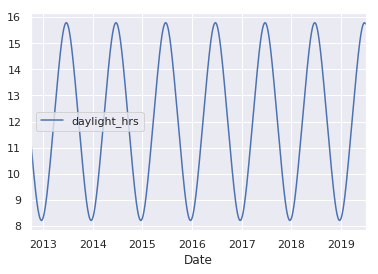

In [ ]:
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
  """Compute the hours of daylight for the given date"""
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = [hours_of_daylight(d) for d in daily.index]
daily[['daylight_hrs']].plot();

Earlier we downloaded weather data, and express temperature and PRCP (precipitation) in more convenient units and add one more column indicating whether the day was dry or not ($0$ or $1$). We want for the change in the count of cyclists that due to the time passed from the start of experiment ('annual' feature).

In [ ]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily['annual'] = (daily.index - daily.index[0]).days / 365
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.0,1.335,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.219142,0.0,0.0,1.360,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.161038,0.0,0.0,1.530,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.103056,0.0,0.0,1.585,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.045208,0.0,0.0,1.585,1,0.010959


We now have model with $13$ features
* day of week ($7$ binary features);
* daylight hours (float);
* holiday/not holiday (binary);
* PRCP (float);
* temperature (float);
* dry/not dry day (binary);
* time passed from the first day of observations (float).

Now we do simple linear regression and look at the prediction.

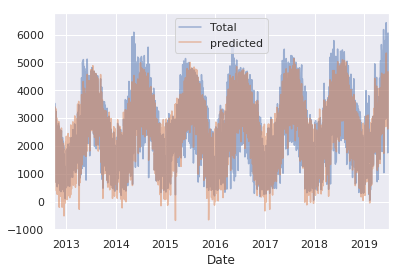

In [ ]:
from sklearn.linear_model import LinearRegression

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

Here are coefficients of our linear model.

In [ ]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              472.562051
Tue              677.815624
Wed              658.769963
Thu              505.487985
Fri              187.045078
Sat            -1168.906823
Sun            -1249.929398
holiday        -1113.753085
daylight_hrs     117.494530
PRCP           -6960.460185
dry day          508.583021
Temp (C)         749.192797
annual            49.203277
dtype: float64

We now use **bootstrapping** technique to get a feeling how uncertain our parameters are.
The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modeled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/boots_dr_martens_black.jpg)

We resample our training set (with replacement). Some datapoints will be missing, some will occur twice or tree times, etc. We than fit our model, get the coefficients and calculate their std's.

In [ ]:
from sklearn.utils import resample

np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            473.0   65.0
Tue            678.0   64.0
Wed            659.0   62.0
Thu            505.0   64.0
Fri            187.0   62.0
Sat          -1169.0   62.0
Sun          -1250.0   62.0
holiday      -1114.0  149.0
daylight_hrs   117.0    7.0
PRCP         -6960.0  455.0
dry day        509.0   25.0
Temp (C)       749.0   32.0
annual          49.0    6.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays. We see that for each $404$ additional hour of daylight, $129 \pm 9$ more people choose to ride; a temperature increase of one degree Celsius encourages $65 \pm 4$ people to grab their bicycle; a dry day means an average of $546 \pm 33$ more riders; and each inch of precipitation means $665 \pm 62$ more people leave their bike at home. Once all these effects are accounted for, we see a modest increase of $28 \pm 18$ new daily riders each year.


Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days). These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!